# Non-Motor Assessments
In this notebook we will analyze some aspects of the non-motor variables, measurements done in PPMI dataset

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# All non-motor test sheets (what is there in each one), is described on page 8 of the curation_summary document
# In this notebook we will look at each file in the full dataset related to non-motor tests

In [3]:
path = 'C:\\Users\\Admin\\Desktop\\Capstone\\All_Files\\New_Attempt\\'


### Benton Judgement of Line Orientation
The Benton Judegment of Line Orientation test measures a person's ability to match the angle and orientation of lines in space. Subjects are asked to match two angled lines to a set of 11 lines that are arranged in a semicircle and separated 18 degrees from each other. The complete test has 30 items. 
That is why we have 30 columns for BJLOT<num> where num=1 to 30
But certain columns only occur on certain visits
It seems like on certain days only a few lines in the orientation were tested on. And on other days some other lines.

There is `JLO_TOTRAW` variable which is the sum of the scores (1 for correct and 0 for incorrect) on a particular visit.
On taking a closer look. Some visits do odd number of lines, some do even. Which means effectively everytime only half of them are done. We will look at the stats related to this.
The details on which visit has odd items and which has even read from Pg 67 in the PPMI_Protocol document.

`JLO_TOTCALC` scales the raw score and gives how well a person did out of 30 - which is the standard for the test. This will be an important measure for our purposes.

`DVS_JLO_MSSA` gives `JLO_TOTRAW` + `COMM` but not sure when `COMM` appears. It is rare in the CSV file.

`DVS_JLO_MSSAE` seems some kind of error or a floating point representation of the `DVS_JLO_MSSA` column. Didn't find anything in the document related to this yet.

In [4]:
file = os.path.join(path, "Benton_Judgment_of_Line_Orientation.csv")
df_1 = pd.read_csv(file)
print("Total number of rows are:",len(df_1))
df_1.head(3)

Total number of rows are: 11617


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,BENTONVERSION,BJLOT1,BJLOT2,BJLOT3,BJLOT4,...,BJLOT28,BJLOT29,BJLOT30,JLO_TOTRAW,JLO_TOTCALC,AGE_ASSESS_JLO,DVS_JLO_MSSA,DVS_JLO_MSSAE,ORIG_ENTRY,LAST_UPDATE
0,272452301,3000,BL,BENTONOD,02/2011,1,1.0,NaN,1.0,NaN,...,NaN,1.0,NaN,15.0,30.0,69.0,16.0,15.0,02/2011,2020-06-25 16:02:19.0
1,338703701,3000,V04,BENTONEV,03/2012,2,NaN,1.0,NaN,1.0,...,1.0,NaN,1.0,15.0,30.0,70.0,16.0,15.0,03/2012,2020-06-25 16:02:21.0
2,385010901,3000,V06,BENTONOD,02/2013,1,1.0,NaN,1.0,NaN,...,NaN,1.0,NaN,14.0,28.0,71.0,14.0,12.8,02/2013,2020-06-25 16:02:22.0


In [5]:
print("Number of total records (rows):",len(df_1))
# Looks like a few patients did not do the BL visit
print("Number of records for baseline visit:",len(df_1[df_1.EVENT_ID=="BL"]))
print("Unique patients:", len(df_1.PATNO.unique()))

Number of total records (rows): 11617
Number of records for baseline visit: 3269
Unique patients: 3274


Text(0, 0.5, 'Number of subjects')

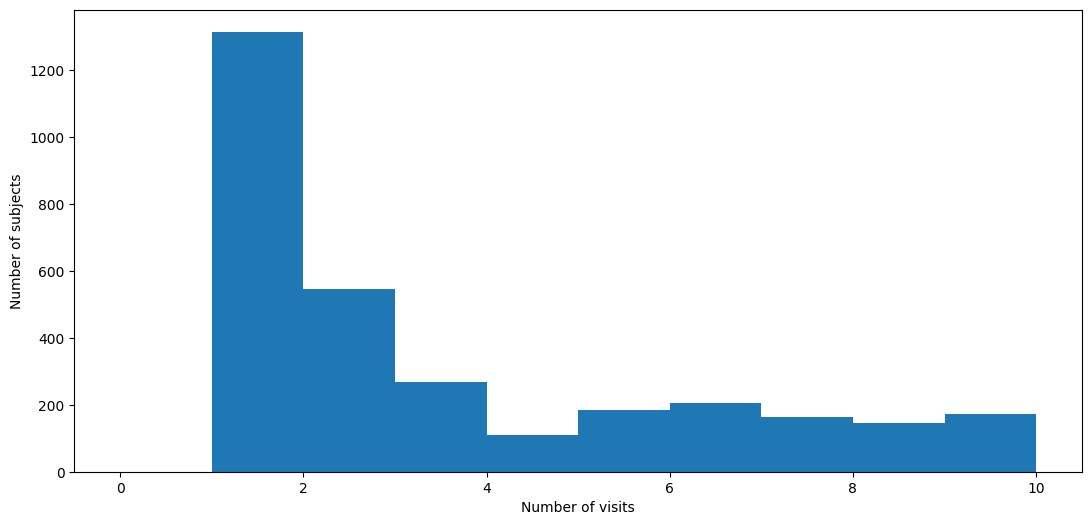

In [6]:
# Plot to show the number of visits done by the patients - Like how many people did 7 visits, 8 visits and so on
# We do this by grouping PATNO
df_1.groupby(['PATNO']).PATNO.count()
plt.figure(figsize=(13,6))
plt.hist(df_1.groupby(['PATNO']).PATNO.count(),bins=range(0,11))
plt.xlabel('Number of visits')
plt.ylabel('Number of subjects')

# So about 250 subjects have done 6 visits (these are across months). These patients can be monitored for our purposes.

<Axes: xlabel='EVENT_ID'>

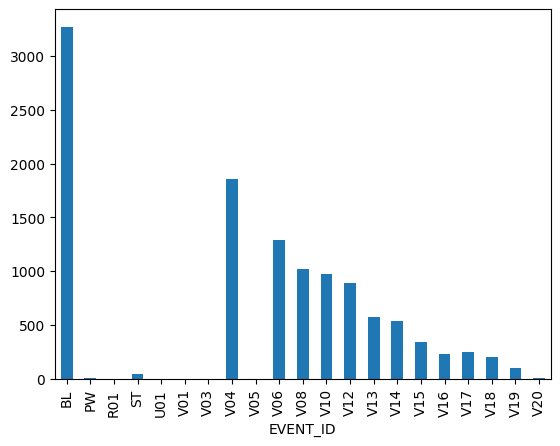

In [7]:
events_series = df_1.groupby(['EVENT_ID']).EVENT_ID.count()


events_series.plot.bar()

(array([  18.,   83.,  205.,  422., 1235., 1492., 2011., 1051.,  381.,
          57.]),
 array([26. , 32.5, 39. , 45.5, 52. , 58.5, 65. , 71.5, 78. , 84.5, 91. ]),
 <BarContainer object of 10 artists>)

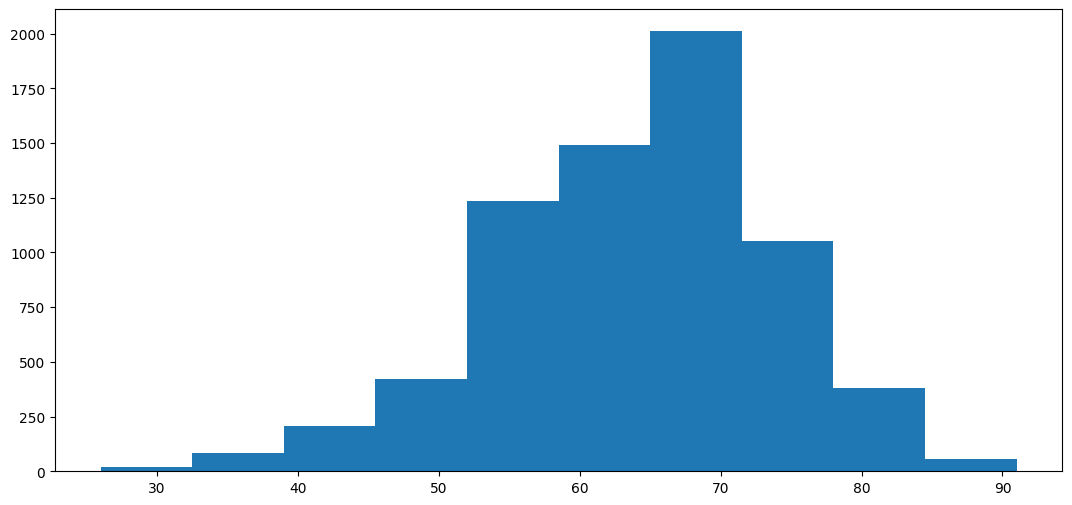

In [8]:
# Distribution of age
plt.figure(figsize=(13,6))
plt.hist(df_1['AGE_ASSESS_JLO'].dropna())

(array([   8.,    0.,    6.,    0.,    7.,    0.,    8.,    0.,   22.,
           0.,   37.,    0.,   69.,    0.,  119.,    0.,  191.,    0.,
         307.,    0.,  459.,    0.,  677.,    0.,  877.,    0., 1138.,
           0., 1519.,    0., 1512.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
        21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <BarContainer object of 31 artists>)

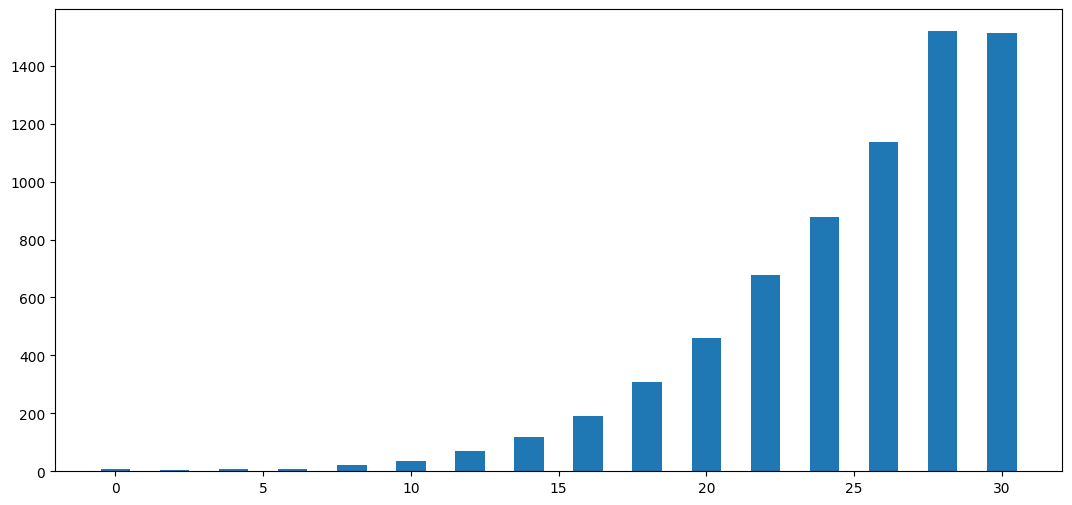

In [9]:
# Check the distribution of scores for TOTCALC
plt.figure(figsize=(13,6))
plt.hist(df_1['JLO_TOTCALC'].dropna().astype(int), bins=np.arange(0,32)-0.5)

In [10]:
# Add graphs to show which visits have which benton test done. But it is also in the PDF so we will do this later

In [11]:
# There are reasons given for some of them and for some the other columns have indicators but still the total is 
# missing. Can discard these entries.
df_1[df_1['JLO_TOTCALC'].isnull()].PATNO.count()

4661

### Epworth Sleepiness Scale
The questionnaire asks the subject to rate his or her probability of falling asleep on a scale of increasing probability from 0 to 3 for eight different situations that most people engage in during their daily lives, though not necessarily every day

Can look at non-motor03 in the curated dataset to see the activities for each column. 3 is more sleepy, 1 is less sleepy and so on. Its a scale of 0-3.

`PTCGBOTH` variable might be for Patient-Care giver-Both (1-2-3 values respectively). The curated one has a column that asks who reported the result. So this most likely means the same. Doesn't seem to be that important for our purposes.

There isn't any aggregation across the sleepiness scores. They are all individual depending on certain times in the day and the activity being done by the patient. From overall analysis all of these columns (prefixed with ESS) would be important for prediction.

In [12]:
file = os.path.join(path, "Epworth_Sleepiness_Scale.csv")
df_2 = pd.read_csv(file)
print("Total number of rows are:",len(df_2))
df_2.head(3)

Total number of rows are: 13340


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,ESS1,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,ORIG_ENTRY,LAST_UPDATE
0,272456501,3000,BL,EPWORTH,02/2011,1.0,2,1.0,0,0.0,2.0,0.0,0.0,0.0,02/2011,2020-06-25 16:02:19.0
1,338704701,3000,V04,EPWORTH,03/2012,1.0,2,0.0,0,0.0,3.0,0.0,2.0,0.0,03/2012,2020-06-25 16:02:21.0
2,385012901,3000,V06,EPWORTH,02/2013,1.0,1,1.0,0,0.0,2.0,0.0,1.0,0.0,02/2013,2020-06-25 16:02:22.0


Text(0, 0.5, 'Number of subjects')

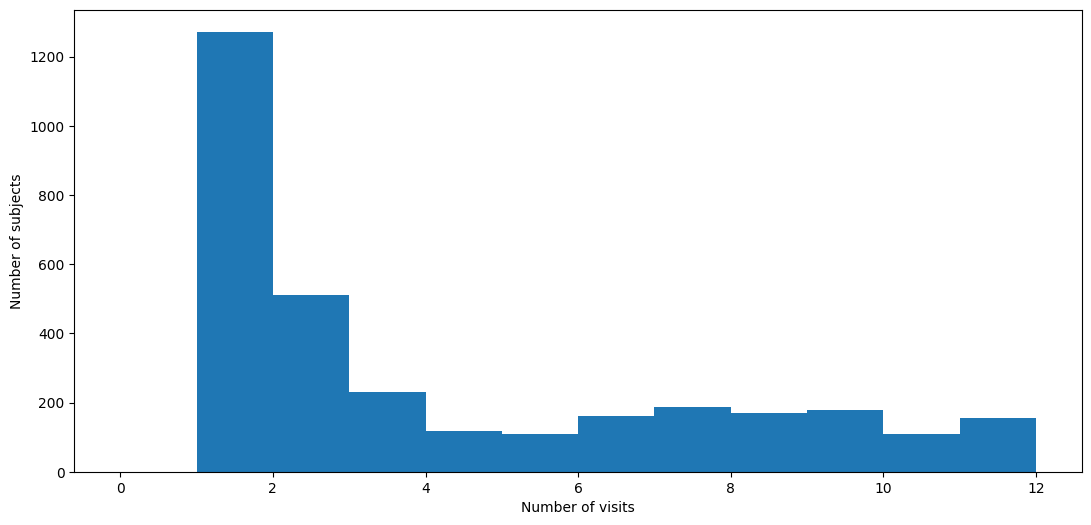

In [13]:
# We'll do graphs similar to the ones for Benton
# Plot to show the number of visits done by the patients - Like how many people did 7 visits, 8 visits and so on
# We do this by grouping PATNO
df_2.groupby(['PATNO']).PATNO.count()
plt.figure(figsize=(13,6))
plt.hist(df_2.groupby(['PATNO']).PATNO.count(), bins=range(0,13))
plt.xlabel('Number of visits')
plt.ylabel('Number of subjects')

# Here number of visits done are pretty consistent. That means we would need to consider more patients, but some
# of them did certain visits, others did some others. Alignment will be an issue

EVENT_ID
BL     3289
PW        8
R01       2
ST      202
U01       1
V01       9
V02    1033
V03       2
V04    1877
V05       3
V06    1353
V08    1091
V10    1041
V12     945
V13     624
V14     575
V15     380
V16     266
V17     283
V18     229
V19     112
V20      15
Name: EVENT_ID, dtype: int64


<Axes: xlabel='EVENT_ID'>

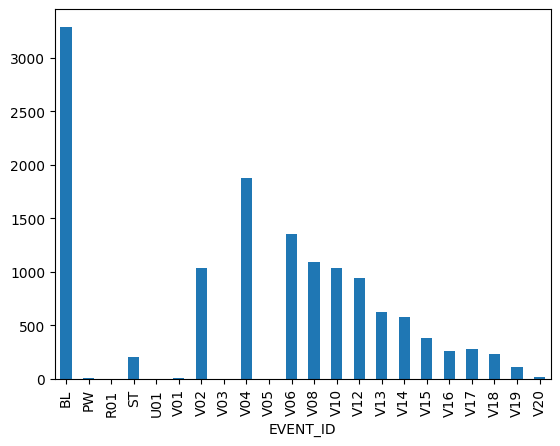

In [14]:
events_series_2 = df_2.groupby(['EVENT_ID']).EVENT_ID.count()
print(events_series_2)

events_series_2.plot.bar()

### Geriatric Depression Scale (GDS-15)
The Geriatric Depression Scale (GDS) is a 30-item self-report assessment used to identify depression in the elderly. We only take 15 of these. Can look at their full form in non-motor04 file from curated dataset.

They are all yes/no type of questions. 1 means yes and 0 means no. All the GDS columns would prove useful as a feature. For this and ESS, a single concatenated encoding vector could be used.

There is no aggregate score available in the full dataset file. `F_STATUS` appears with only 4 rows having 'S' and rest all having 'V', not sure what it stands for.

In [15]:
file = os.path.join(path, "Geriatric_Depression_Scale_Short.csv")
df_3 = pd.read_csv(file)
print("Total number of rows are:",len(df_3))
df_3.head(3)

Total number of rows are: 13648


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,GDSSATIS,GDSDROPD,GDSEMPTY,GDSBORED,GDSGSPIR,...,GDSHLPLS,GDSHOME,GDSMEMRY,GDSALIVE,GDSWRTLS,GDSENRGY,GDSHOPLS,GDSBETER,ORIG_ENTRY,LAST_UPDATE
0,272456901,3000,BL,GDSSHORT,02/2011,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,02/2011,2020-06-25 16:02:19.0
1,338705101,3000,V04,GDSSHORT,03/2012,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,03/2012,2020-06-25 16:02:21.0
2,385013301,3000,V06,GDSSHORT,02/2013,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,02/2013,2020-06-25 16:02:22.0


Text(0, 0.5, 'Number of subjects')

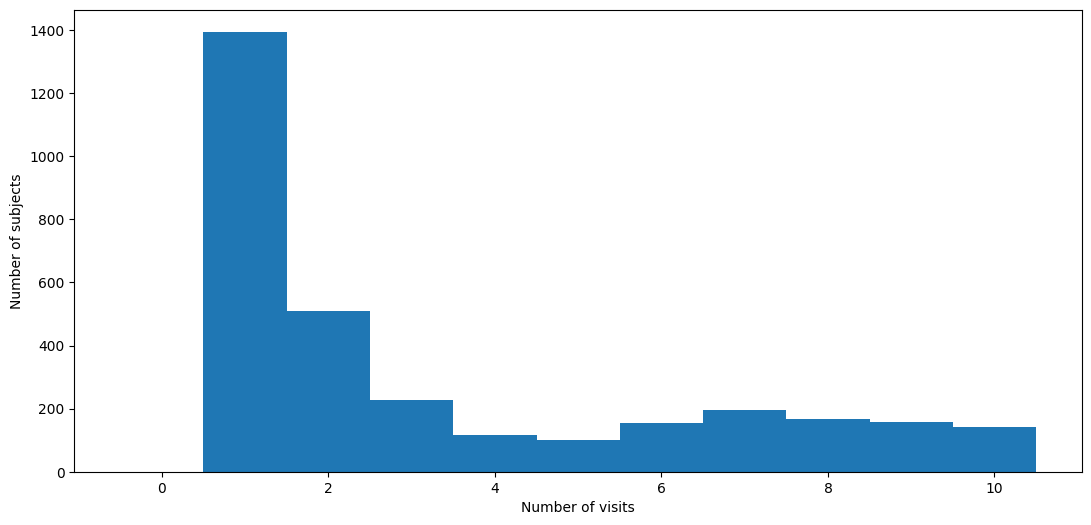

In [16]:
# We'll do similar graphs for this too due to the similarity in structure in all these tables
# Plot to show the number of visits done by the patients - Like how many people did 7 visits, 8 visits and so on
# We do this by grouping PATNO
df_3.groupby(['PATNO']).PATNO.count()
plt.figure(figsize=(13,6))
plt.hist(df_3.groupby(['PATNO']).PATNO.count(), bins=np.arange(0,12)-0.5)
plt.xlabel('Number of visits')
plt.ylabel('Number of subjects')

# Again there seems to be an even spread but falls off after 8, so we can skip those patients or not take
# their final few visits into account

EVENT_ID
BL     3216
PW        8
R01       2
SC      385
ST      202
U01       2
V01       9
V02    1033
V03       3
V04    1877
V05       3
V06    1351
V08    1091
V10    1038
V12     945
V13     624
V14     575
V15     381
V16     266
V17     283
V18     227
V19     112
V20      15
Name: EVENT_ID, dtype: int64


<Axes: xlabel='EVENT_ID'>

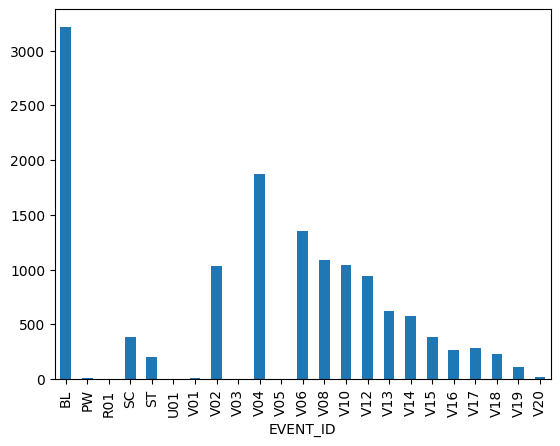

In [17]:
events_series_3 = df_3.groupby(['EVENT_ID']).EVENT_ID.count()
print(events_series_3)

events_series_3.plot.bar()

# Like ESS seems to fall off after the 4th visit

### Hopkins Verbal Learning Test – Revised
HVLT - A new test of verbal learning and memory, the Hopkins Verbal Learning Test, was developed. The test consists of three trials of free-recall of a 12-item, semantically categorized list, followed by yes/no recognition. The revised might have some additional things.

The full forms for our column headers can be found in curated non-motor05 file. All the DVT columns in the full dataset are the dervied values and hence are important features for the model. `HVLTRSN` is the booklet version used for the test.

It also looks like a higher value for all these tests is better. Which can give a high score overall. We should probably look to use the derived scores as features, since those encode the most important part of the information.

In [18]:
file = os.path.join(path, "Hopkins_Verbal_Learning_Test.csv")
df_4 = pd.read_csv(file)
print("Total number of rows are:",len(df_4))
df_4.head(3)

Total number of rows are: 11658


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,HVLTRT1,HVLTRT2,HVLTRT3,HVLTRDLY,HVLTREC,HVLTFPRL,HVLTFPUN,HVLTVRSN,AGE_ASSESS_HVLT,DVT_TOTAL_RECALL,DVT_DELAYED_RECALL,DVT_RETENTION,DVT_RECOG_DISC_INDEX,ORIG_ENTRY,LAST_UPDATE
0,272452101,3000,BL,HVLT,02/2011,8.0,11.0,11.0,10.0,12.0,0.0,0.0,1.0,69.0,62.0,56.0,52.0,59.0,02/2011,2020-06-25 16:02:19.0
1,338703501,3000,V04,HVLT,03/2012,7.0,9.0,10.0,10.0,11.0,1.0,0.0,2.0,70.0,54.0,56.0,56.0,47.0,03/2012,2020-06-25 16:02:21.0
2,385010701,3000,V06,HVLT,02/2013,6.0,11.0,11.0,10.0,12.0,1.0,0.0,3.0,71.0,58.0,56.0,52.0,50.0,02/2013,2020-06-25 16:02:22.0


Text(0, 0.5, 'Number of instances')

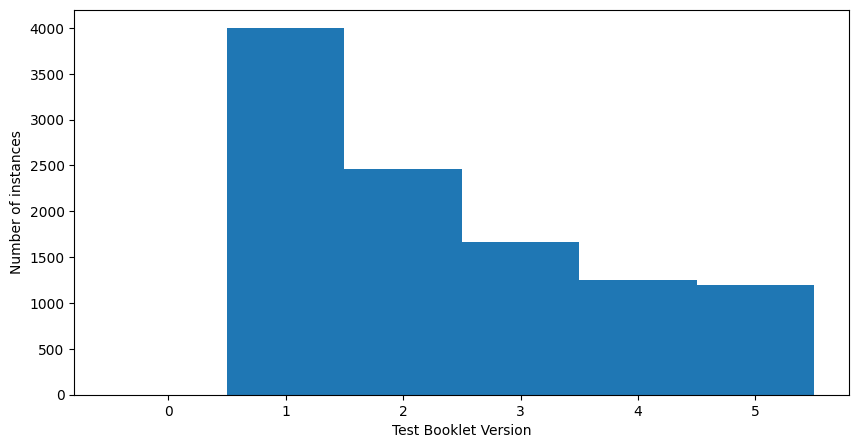

In [19]:
# Let's see the different versions and which one was used the most

# df_4.HVLTVRSN.min()

plt.figure(figsize=(10,5))
plt.hist(df_4.HVLTVRSN.dropna(), bins=np.arange(0,7)-0.5)
plt.xlabel('Test Booklet Version')
plt.ylabel('Number of instances')

# So we can use just the records for version 1 and 2. Or we can take all since the metrics stay the same

Text(0, 0.5, 'DVT_RECOG_DISC_INDEX')

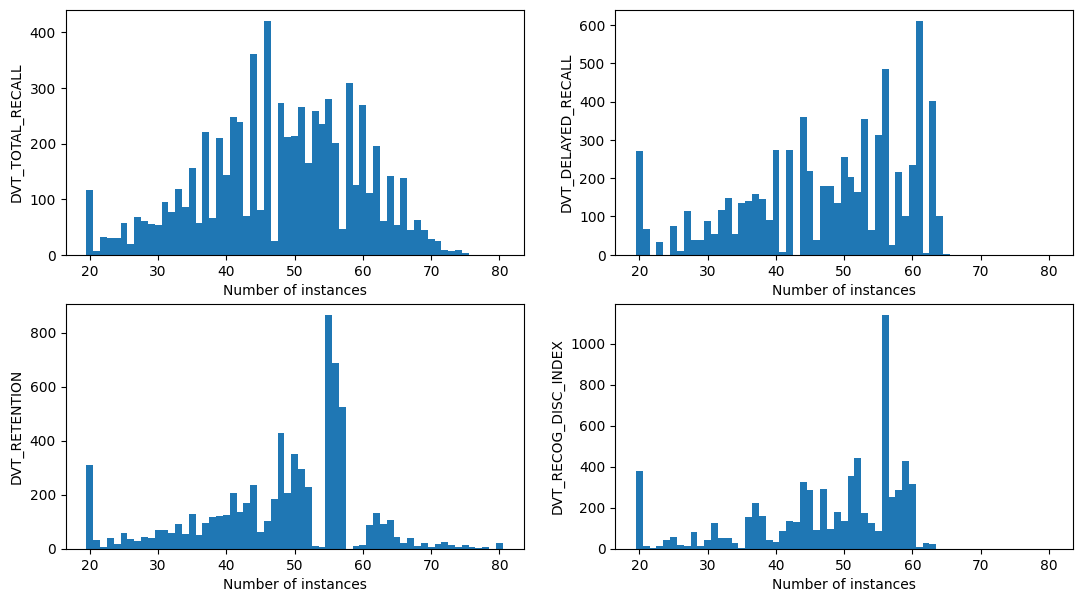

In [20]:
# Let's look at the distribution of the derived scores across subjects and visits
# df_4.DVT_RECOG_DISC_INDEX.min()

plt.figure(figsize=(13,7))
plt.subplot(2,2,1)
plt.hist(df_4.DVT_TOTAL_RECALL.dropna(), bins=np.arange(20,82)-0.5)
plt.xlabel('Number of instances')
plt.ylabel('DVT_TOTAL_RECALL')

plt.subplot(2,2,2)
plt.hist(df_4.DVT_DELAYED_RECALL.dropna(), bins=np.arange(20,82)-0.5)
plt.xlabel('Number of instances')
plt.ylabel('DVT_DELAYED_RECALL')

plt.subplot(2,2,3)
plt.hist(df_4.DVT_RETENTION.dropna(), bins=np.arange(20,82)-0.5)
plt.xlabel('Number of instances')
plt.ylabel('DVT_RETENTION')

plt.subplot(2,2,4)
plt.hist(df_4.DVT_RECOG_DISC_INDEX.dropna(), bins=np.arange(20,82)-0.5)
plt.xlabel('Number of instances')
plt.ylabel('DVT_RECOG_DISC_INDEX')

# Scores for most of these except the Recall test lies between 50-60; but overall a large chunk between 40 and 60 for
# all of the derived scores

EVENT_ID
BL     3272
PW        5
R01       1
ST       55
U01       1
V01       2
V03       2
V04    1863
V05       3
V06    1299
V08    1028
V10     971
V12     889
V13     581
V14     543
V15     352
V16     229
V17     249
V18     204
V19      97
V20      12
Name: EVENT_ID, dtype: int64


<Axes: xlabel='EVENT_ID'>

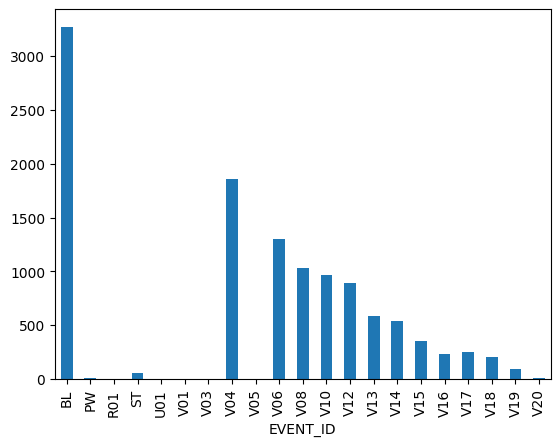

In [21]:
events_series_4 = df_4.groupby(['EVENT_ID']).EVENT_ID.count()
print(events_series_4)
# print(events_series.axes)
# print(type(events_series.axes))
# print(events_series.values)

events_series_4.plot.bar()
# Similar to others, gradual drop after a peek at V04

### Letter Number Sequencing
This is another neuropsychological test done on certain visits. Participants must recall a series of numbers in increasing order and letters in alphabetical order. 1 is correct and 0 is incorrect for each. There are 7 trials and two parts to each. 

`LNS_TOTRAW`(LNS-Sum Questions 1-7) and `DVS_LNS` (Derived-LNS Scaled Score) seem to be the important metrics we should add to the feature test from this test. Or only the derived one should also work. Not sure what calculation goes into the derived score, at some points values have increased and at some decreased from the TOTRAW

In [22]:
file = os.path.join(path, "Letter_Number_Sequencing__PD.csv")
df_5 = pd.read_csv(file)
print("Total number of rows are:",len(df_5))
df_5.head(3)

Total number of rows are: 11626


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,LNS1A,LNS1B,LNS1C,LNS2A,LNS2B,...,LNS6B,LNS6C,LNS7A,LNS7B,LNS7C,LNS_TOTRAW,AGE_ASSESS_LNS,DVS_LNS,ORIG_ENTRY,LAST_UPDATE
0,272452901,3000,BL,LNSPD,02/2011,1,1,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,14.0,69.0,15.0,02/2011,2020-06-25 16:02:19.0
1,338704101,3000,V04,LNSPD,03/2012,1,1,1.0,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,14.0,70.0,16.0,03/2012,2020-06-25 16:02:21.0
2,385012001,3000,V06,LNSPD,02/2013,1,1,1.0,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,13.0,71.0,15.0,02/2013,2020-06-25 16:02:22.0


Text(0, 0.5, 'DVS_LNS')

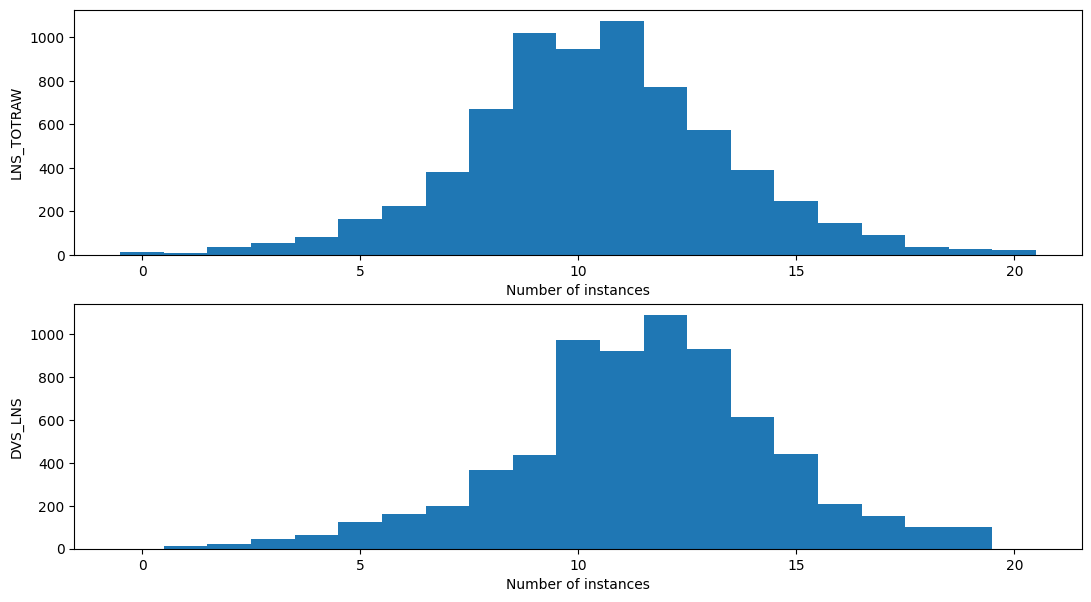

In [23]:
# Let's look at the distribution of the derived scores across subjects and visits
# df_5.DVS_LNS.max()

plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
plt.hist(df_5.LNS_TOTRAW.dropna(), bins=np.arange(0,22)-0.5)
plt.xlabel('Number of instances')
plt.ylabel('LNS_TOTRAW')

plt.subplot(2,1,2)
plt.hist(df_5.DVS_LNS.dropna(), bins=np.arange(0,22)-0.5)
plt.xlabel('Number of instances')
plt.ylabel('DVS_LNS')

# Look like Gaussians which is expected on any test

EVENT_ID
BL     3268
PW        5
R01       1
ST       51
U01       1
V01       2
V03       2
V04    1863
V05       3
V06    1293
V08    1023
V10     968
V12     887
V13     581
V14     539
V15     348
V16     229
V17     248
V18     204
V19      98
V20      12
Name: EVENT_ID, dtype: int64


<Axes: xlabel='EVENT_ID'>

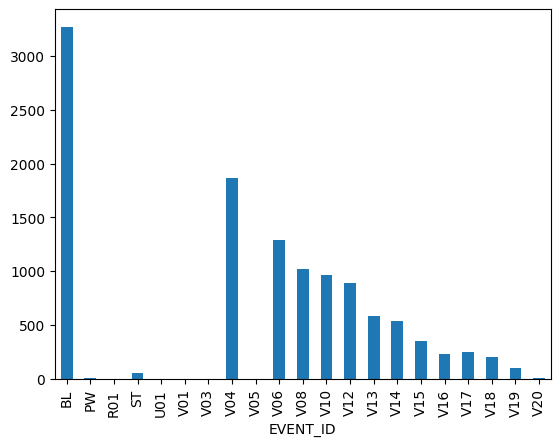

In [24]:
events_series_5 = df_5.groupby(['EVENT_ID']).EVENT_ID.count()
print(events_series_5)
# print(events_series.axes)
# print(type(events_series.axes))
# print(events_series.values)

events_series_5.plot.bar()
# Again we see the same trend. Seems to be consistent across all the non-motor tables

### Montreal Cognitive Assessment (MoCA)
The Montreal Cognitive Assessment (MoCA) is a widely used screening assessment for detecting cognitive impairment. The details and also the column headers can be seen in curated non-motor07 file. 27 different tests are given to the subjects. The specific tests are listed in the curated file.

`MCATOT` is the one that is the epitome of this sheet. Should add to the feature set. `F_STATUS` is there in this file too but still not sure what it stands for.

In [25]:
file = os.path.join(path, "Montreal_Cognitive_Assessment__MoCA.csv")
df_6 = pd.read_csv(file)
print("Total number of rows are:",len(df_5))
df_6.head(3)

Total number of rows are: 11626


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,MCAALTTM,MCACUBE,MCACLCKC,MCACLCKN,MCACLCKH,...,MCAREC5,MCADATE,MCAMONTH,MCAYR,MCADAY,MCAPLACE,MCACITY,MCATOT,ORIG_ENTRY,LAST_UPDATE
0,269556101,3000,SC,MOCA,01/2011,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,27.0,01/2011,2020-06-25 16:02:21.0
1,338704501,3000,V04,MOCA,03/2012,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,29.0,03/2012,2020-06-25 16:02:21.0
2,385012501,3000,V06,MOCA,02/2013,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,28.0,02/2013,2020-06-25 16:02:22.0


Text(0, 0.5, 'MCATOT')

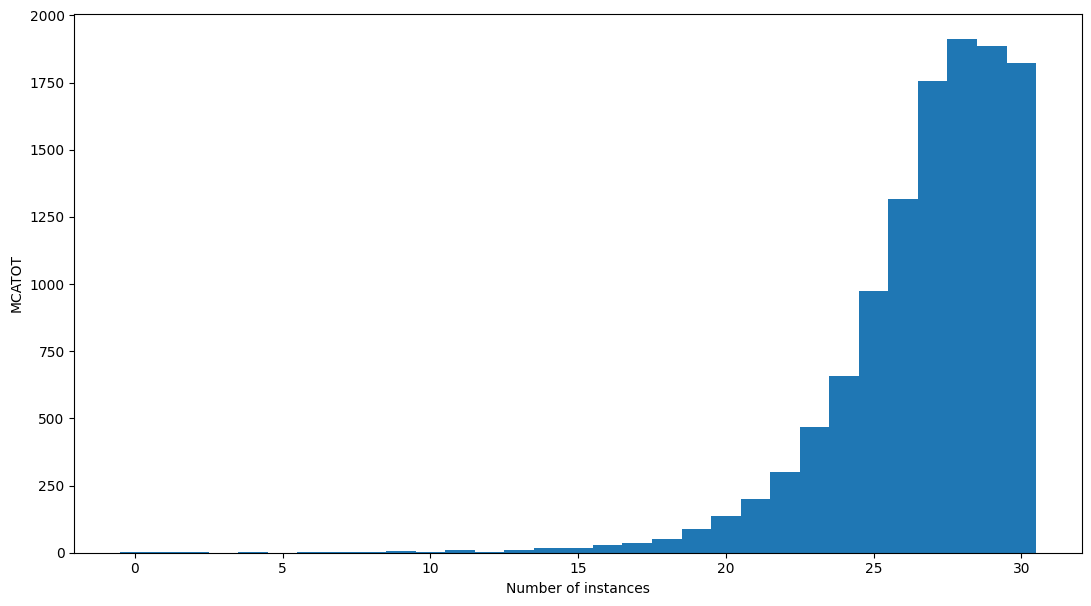

In [26]:
# Distribution of total scores
# df_6.MCATOT.max()

plt.figure(figsize=(13,7))
plt.hist(df_6.MCATOT.dropna(), bins=np.arange(0,32)-0.5)
plt.xlabel('Number of instances')
plt.ylabel('MCATOT')

# Everyone has a pretty high score on this test

EVENT_ID
BL     1254
PW        6
R01       1
RS1       4
SC     2554
ST       51
U01       3
V01       2
V03       2
V04    1867
V05       2
V06    1299
V08    1028
V10     978
V12     894
V13     585
V14     543
V15     352
V16     233
V17     252
V18     205
V19      99
V20      12
Name: EVENT_ID, dtype: int64


<Axes: xlabel='EVENT_ID'>

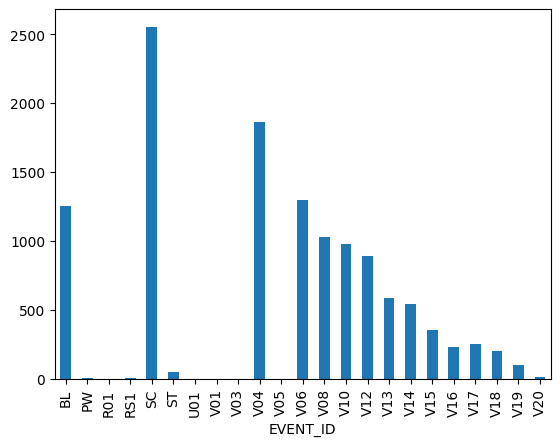

In [27]:
# Number of patients per visit graph
events_series_6 = df_6.groupby(['EVENT_ID']).EVENT_ID.count()
print(events_series_6)
# print(events_series.axes)
# print(type(events_series.axes))
# print(events_series.values)

events_series_6.plot.bar()

### Olfactory Testing (UPSIT)
The University of Pennsylvania Smell Identification Test (UPSIT) is a test that is commercially available for smell identification to test the function of an individual's olfactory system.

Response columns have the thing they were actually told to smell and then whether they got it correct or not is in another column. Only the `TOTAL_CORRECT` seems to have some kind of signal related to this test. The percentage column I'm not sure about. It seems off or don't seem to get the calculation they have used there.

Surprisingly this file doesn't have which visit happened on which visit. We would have to align using the date.

`non-motor15` file has this test

In [28]:
file = os.path.join(path, "Olfactory_UPSIT.csv")
df_7 = pd.read_csv(file)
print("Total number of rows are:",len(df_7))
df_7.head(3)

Total number of rows are: 4668


,SUBJECT_ID,PROTOCOL_ID,COMPLT_DATE,SCENT_10_RESPONSE,SCENT_09_RESPONSE,SCENT_08_RESPONSE,SCENT_07_RESPONSE,SCENT_06_RESPONSE,SCENT_05_RESPONSE,SCENT_04_RESPONSE,...,SCENT_37_CORRECT,SCENT_36_CORRECT,SCENT_35_CORRECT,SCENT_34_CORRECT,SCENT_33_CORRECT,SCENT_32_CORRECT,SCENT_31_CORRECT,TOTAL_CORRECT,UPSITFORM,UPSIIT_PRCNTGE
0,90000,P-PPMI Cohort,04/2013,2,3,2,1,2,3,4,...,1,0,1,1,1,1,1,38,1,98
1,90001,P-PPMI Cohort,04/2013,2,3,2,1,2,3,4,...,0,1,1,0,1,0,1,30,1,36
2,90002,P-PPMI Cohort,03/2013,2,3,2,1,2,1,4,...,1,1,1,0,1,1,1,28,1,36


Text(0, 0.5, 'Number of instances')

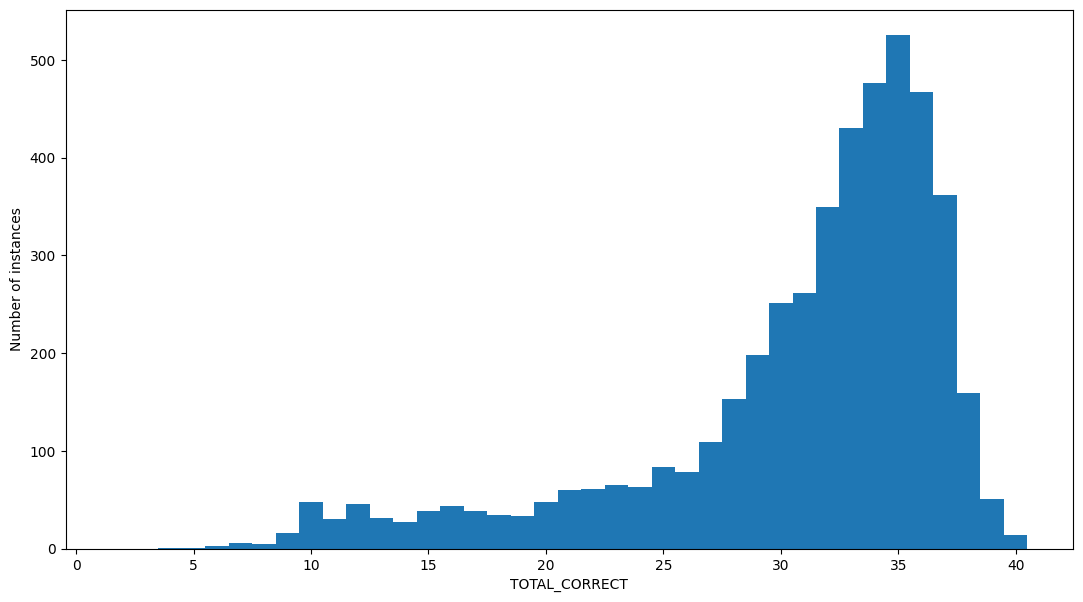

In [29]:
# Distribution of the total scores for this test
# df_7.TOTAL_CORRECT.max()

plt.figure(figsize=(13,7))
plt.hist(df_7.TOTAL_CORRECT.dropna(), bins=np.arange(2,42)-0.5)
plt.xlabel('TOTAL_CORRECT')
plt.ylabel('Number of instances')

# Tending to the higher side for most patients

COMPLT_DATE
01/2014    352
01/2015     35
02/2014    120
03/2013     36
03/2014    132
04/2013     96
04/2014    139
05/2013    129
05/2014    109
05/2015      1
06/2013     91
06/2014    132
06/2015     12
07/2013    728
07/2014     98
07/2015      3
08/2013    635
08/2014    109
08/2015      4
09/2013    367
09/2014    101
09/2015     16
10/2013    500
10/2014     83
11/2013    306
11/2014     89
12/2013    204
12/2014     41
Name: COMPLT_DATE, dtype: int64


<Axes: xlabel='COMPLT_DATE'>

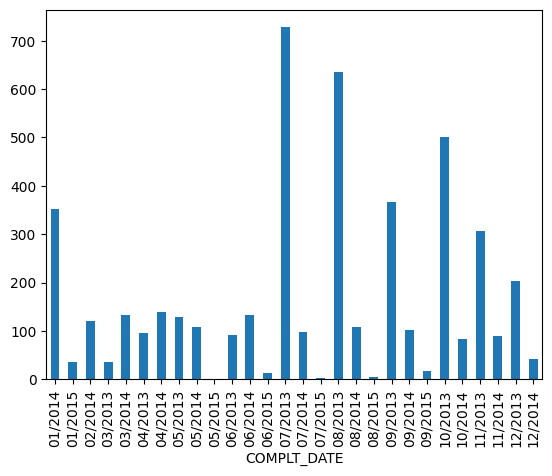

In [30]:
# Number of patients per visit graph
events_series_7 = df_7.groupby(['COMPLT_DATE']).COMPLT_DATE.count()
print(events_series_7)
# print(events_series.axes)
# print(type(events_series.axes))
# print(events_series.values)

events_series_7.plot.bar()

# The problem with doing dates is that it is too spread out. So we might need to map these to visits like the other
# tests

### QUIP
This is a questionnaire about gambling, buying, etc. It is a nerobehavioral questionnaire.

1 means yes and 0 means no for answers to the questions. `non-motor08` (curated dataset) has each question listed. In the curated one there is a summary score, but in the full dataset there isn't. So we might need to encode an entire vector so each question holds value on its own as a feature.

In [31]:
file = os.path.join(path, "QUIP_Current_Short.csv")
df_8 = pd.read_csv(file)
print("Total number of rows are:",len(df_8))
df_8.head(3)

Total number of rows are: 13329


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTINBOTH,TMGAMBLE,CNTRLGMB,TMSEX,CNTRLSEX,...,CNTRLBUY,TMEAT,CNTRLEAT,TMTORACT,TMTMTACT,TMTRWD,TMDISMED,CNTRLDSM,ORIG_ENTRY,LAST_UPDATE
0,272459201,3000,BL,QUIPCS,02/2011,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,02/2011,2020-06-25 16:02:19.0
1,338705501,3000,V04,QUIPCS,03/2012,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,03/2012,2020-06-25 16:02:22.0
2,385014001,3000,V06,QUIPCS,02/2013,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,02/2013,2020-06-25 16:02:22.0


Text(0, 0.5, 'Number of instances')

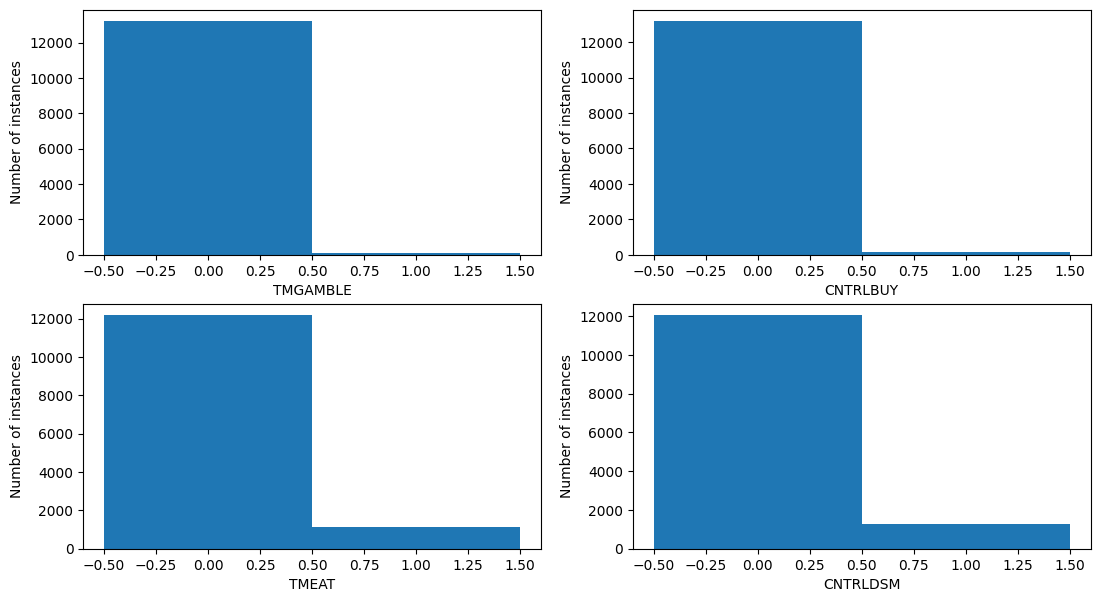

In [32]:
# Picked five questions randomly to see the values
plt.figure(figsize=(13,7))
plt.subplot(2,2,1)
plt.hist(df_8.TMGAMBLE.dropna(), bins=np.arange(0,3)-0.5)
plt.xlabel('TMGAMBLE')
plt.ylabel('Number of instances')

plt.subplot(2,2,2)
plt.hist(df_8.CNTRLBUY.dropna(), bins=np.arange(0,3)-0.5)
plt.xlabel('CNTRLBUY')
plt.ylabel('Number of instances')

plt.subplot(2,2,3)
plt.hist(df_8.TMEAT.dropna(), bins=np.arange(0,3)-0.5)
plt.xlabel('TMEAT')
plt.ylabel('Number of instances')

plt.subplot(2,2,4)
plt.hist(df_8.TMTORACT.dropna(), bins=np.arange(0,3)-0.5)
plt.xlabel('CNTRLDSM')
plt.ylabel('Number of instances')

# Most of them have a high number of No replies. Can't tell how much information we will get from this test

EVENT_ID
BL     3286
PW        8
R01       2
ST      203
U01       1
V01       9
V02    1033
V03       3
V04    1875
V05       3
V06    1351
V08    1092
V10    1039
V12     943
V13     624
V14     572
V15     380
V16     266
V17     282
V18     229
V19     113
V20      15
Name: EVENT_ID, dtype: int64


<Axes: xlabel='EVENT_ID'>

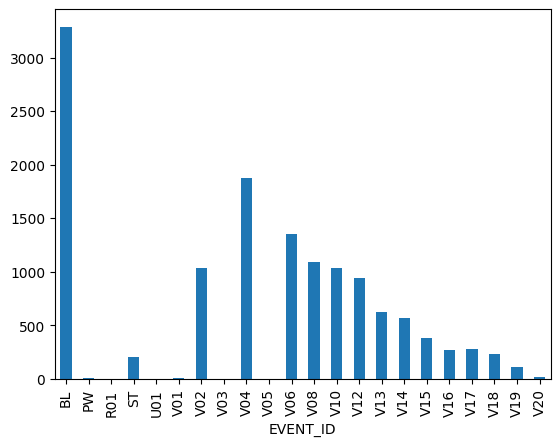

In [33]:
# Number of patients per visit graph
events_series_8 = df_8.groupby(['EVENT_ID']).EVENT_ID.count()
print(events_series_8)

events_series_8.plot.bar()
# Again the tapering trend down from V04

### REM Sleep Behavior Questionnaire
This is a Sleep Disorder Test. Very similar format to the QUIPCS in the previous section. This one has questions related to sleeping problems. Full forms for column headers in `non-motor09` file.

0 stands of No. 1 for yes. `CNSOTHCM` column specifies any other disorders. No summary score in the full dataset so may be we have to do our aggregation or use the columns individually as features.

In [34]:
file = os.path.join(path, "REM_Sleep_Disorder_Questionnaire.csv")
df_9 = pd.read_csv(file)
print("Total number of rows are:",len(df_9))
df_9.head(3)

Total number of rows are: 13353


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,DRMVIVID,DRMAGRAC,DRMNOCTB,SLPLMBMV,...,HETRA,PARKISM,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM,CNSOTH,ORIG_ENTRY,LAST_UPDATE
0,272456701,3000,BL,REMSLEEP,02/2011,1.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,02/2011,2020-06-25 16:02:19.0
1,338704901,3000,V04,REMSLEEP,03/2012,1.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,03/2012,2020-06-25 16:02:22.0
2,385013101,3000,V06,REMSLEEP,02/2013,1.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,02/2013,2020-06-25 16:02:22.0


Text(0, 0.5, 'Number of instances')

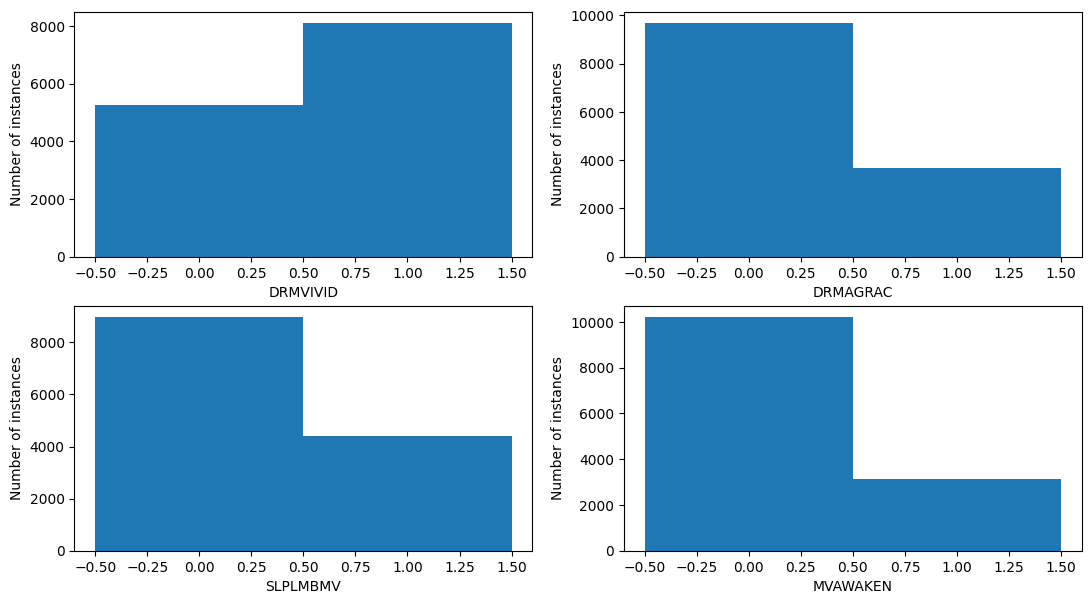

In [35]:
# Picked five questions randomly to see the values
plt.figure(figsize=(13,7))
plt.subplot(2,2,1)
plt.hist(df_9.DRMVIVID.dropna(), bins=np.arange(0,3)-0.5)
plt.xlabel('DRMVIVID')
plt.ylabel('Number of instances')

plt.subplot(2,2,2)
plt.hist(df_9.DRMAGRAC.dropna(), bins=np.arange(0,3)-0.5)
plt.xlabel('DRMAGRAC')
plt.ylabel('Number of instances')

plt.subplot(2,2,3)
plt.hist(df_9.SLPLMBMV.dropna(), bins=np.arange(0,3)-0.5)
plt.xlabel('SLPLMBMV')
plt.ylabel('Number of instances')

plt.subplot(2,2,4)
plt.hist(df_9.MVAWAKEN.dropna(), bins=np.arange(0,3)-0.5)
plt.xlabel('MVAWAKEN')
plt.ylabel('Number of instances')

# This one has a better split between 0s and 1s

EVENT_ID
BL     3295
PW        8
R01       2
ST      203
U01       1
V01       9
V02    1033
V03       2
V04    1878
V05       3
V06    1354
V08    1093
V10    1041
V12     946
V13     624
V14     574
V15     381
V16     266
V17     283
V18     229
V19     113
V20      15
Name: EVENT_ID, dtype: int64


<Axes: xlabel='EVENT_ID'>

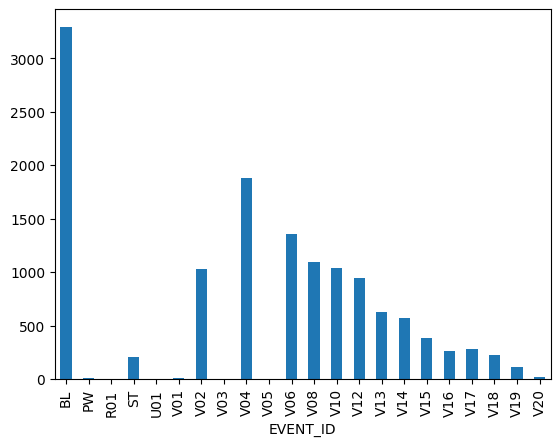

In [36]:
# Number of patients per visit graph
events_series_9 = df_9.groupby(['EVENT_ID']).EVENT_ID.count()
print(events_series_9)
# print(events_series.axes)
# print(type(events_series.axes))
# print(events_series.values)

events_series_9.plot.bar()
# This one goes down from V06

### SCOPA-AUT
This is a autonomic test. It is for gauging the problems the patient is facing with respect to bodily functions. The questionnaire is answered with a scale 0-3 (0-Never, 1-Sometimes, 2-Regularly, 3-Often). `non-motor10` maps to this one.

`SCAU23AT`, mentions any kind of drugs that might be taken by the patient. Similar thing for all columns suffixed with `AT`, `BT`, `CT` (so the columns ending it `T`). In each case it asks for medicines taken for the previous column. This may or may not be useful to us with the initial analysis. Might be useful later. Some are yes/no questions. And then they have to give the specific answer in the next column as mentioned above.

We can again aggregate (sum) these scores. Lower score means better.

In [37]:
file = os.path.join(path, "SCOPA-AUT.csv")
df_10 = pd.read_csv(file)
print("Total number of rows are:",len(df_10))
df_10.head(3)

Total number of rows are: 13325


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,SCAU1,SCAU2,SCAU3,SCAU4,...,SCAU26A,SCAU26AT,SCAU26B,SCAU26BT,SCAU26C,SCAU26CT,SCAU26D,SCAU26DT,ORIG_ENTRY,LAST_UPDATE
0,272459401,3000,BL,SCOPAAUT,02/2011,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,1.0,Lisinopril/Hydrochlorothiazide,0.0,NaN,02/2011,2020-06-25 16:02:19.0
1,338705801,3000,V04,SCOPAAUT,03/2012,1.0,0.0,0.0,0.0,0.0,...,1.0,fish oil,0.0,NaN,1.0,HCTZ,0.0,NaN,03/2012,2020-06-25 16:02:22.0
2,385014301,3000,V06,SCOPAAUT,02/2013,1.0,0.0,0.0,0.0,0.0,...,1.0,"flax seed, fish oil",0.0,NaN,1.0,"HCTZ, lisinopril",0.0,NaN,02/2013,2020-06-25 16:02:22.0


Text(0, 0.5, 'Number of instances')

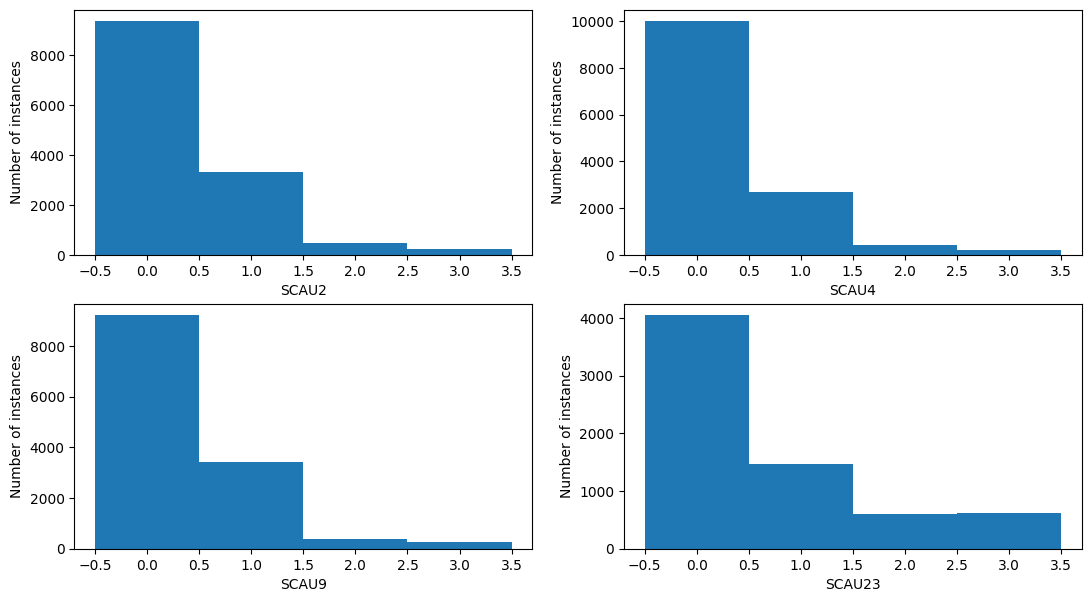

In [38]:
# Graphs for some of the responses ignoring the one that were not answered by some patients
plt.figure(figsize=(13,7))
plt.subplot(2,2,1)
plt.hist(df_10.SCAU2.dropna(), bins=np.arange(0,5)-0.5)
plt.xlabel('SCAU2')
plt.ylabel('Number of instances')

plt.subplot(2,2,2)
plt.hist(df_10.SCAU4.dropna(), bins=np.arange(0,5)-0.5)
plt.xlabel('SCAU4')
plt.ylabel('Number of instances')

plt.subplot(2,2,3)
plt.hist(df_10.SCAU9.dropna(), bins=np.arange(0,5)-0.5)
plt.xlabel('SCAU9')
plt.ylabel('Number of instances')

plt.subplot(2,2,4)
plt.hist(df_10.SCAU23.dropna(), bins=np.arange(0,5)-0.5)
plt.xlabel('SCAU23')
plt.ylabel('Number of instances')

EVENT_ID
BL     3284
PW        8
R01       2
ST      203
U01       1
V01       9
V02    1033
V03       2
V04    1877
V05       3
V06    1350
V08    1093
V10    1039
V12     945
V13     623
V14     573
V15     380
V16     264
V17     282
V18     228
V19     111
V20      15
Name: EVENT_ID, dtype: int64


<Axes: xlabel='EVENT_ID'>

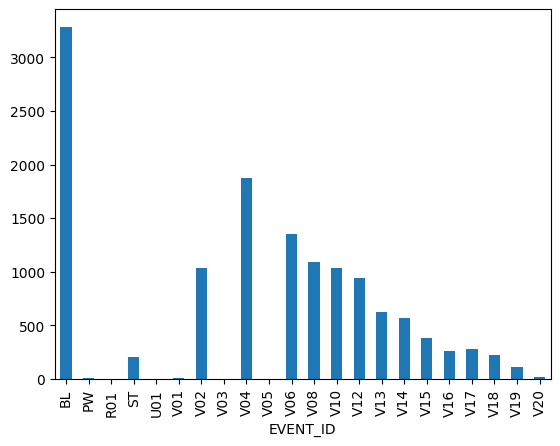

In [39]:
# Number of patients per visit graph
events_series_10 = df_10.groupby(['EVENT_ID']).EVENT_ID.count()
print(events_series_10)

events_series_10.plot.bar()

### Semantic Fluency
Neuropsychological Test. There are two derived scores for animal fluency. One is the T score and one is the scaled score. There are also total number of vegetables and fruits that were shown to participants. Can take these as features.

The `T score` looks important. Details in `non-motor11` file.

In [40]:
file = os.path.join(path, "Semantic_Fluency.csv")
df_11 = pd.read_csv(file)
print("Total number of rows are:",len(df_11))
df_11.head(3)

Total number of rows are: 11667


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,VLTANIM,VLTVEG,VLTFRUIT,AGE_ASSESS_SFTANIM,DVS_SFTANIM,DVT_SFTANIM,ORIG_ENTRY,LAST_UPDATE
0,272452701,3000,BL,SFT,02/2011,28,15.0,22.0,69.0,14.0,62.0,02/2011,2020-06-25 16:02:19.0
1,338703901,3000,V04,SFT,03/2012,22,19.0,18.0,70.0,11.0,52.0,03/2012,2020-06-25 16:02:22.0
2,385011601,3000,V06,SFT,02/2013,23,25.0,15.0,71.0,12.0,56.0,02/2013,2020-06-25 16:02:22.0


Text(0, 0.5, 'Number of instances')

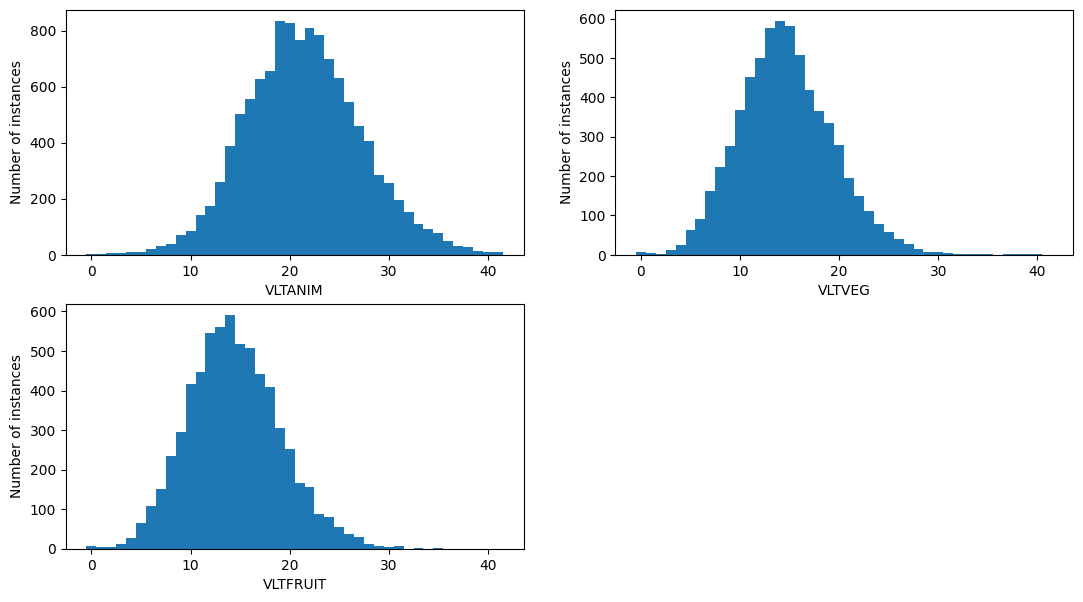

In [41]:
# print(df_11.VLTFRUIT.dropna().min(),df_11.VLTFRUIT.dropna().max())

# Graphs for the total scores
plt.figure(figsize=(13,7))
plt.subplot(2,2,1)
plt.hist(df_11.VLTANIM.dropna(), bins=np.arange(0,43)-0.5)
plt.xlabel('VLTANIM')
plt.ylabel('Number of instances')

plt.subplot(2,2,2)
plt.hist(df_11.VLTVEG.dropna(), bins=np.arange(0,43)-0.5)
plt.xlabel('VLTVEG')
plt.ylabel('Number of instances')

plt.subplot(2,2,3)
plt.hist(df_11.VLTFRUIT.dropna(), bins=np.arange(0,43)-0.5)
plt.xlabel('VLTFRUIT')
plt.ylabel('Number of instances')

EVENT_ID
BL     3272
PW        5
R01       1
ST       51
U01       1
V01       2
V03       2
V04    1867
V05       3
V06    1303
V08    1028
V10     976
V12     892
V13     582
V14     541
V15     348
V16     229
V17     250
V18     204
V19      98
V20      12
Name: EVENT_ID, dtype: int64


<Axes: xlabel='EVENT_ID'>

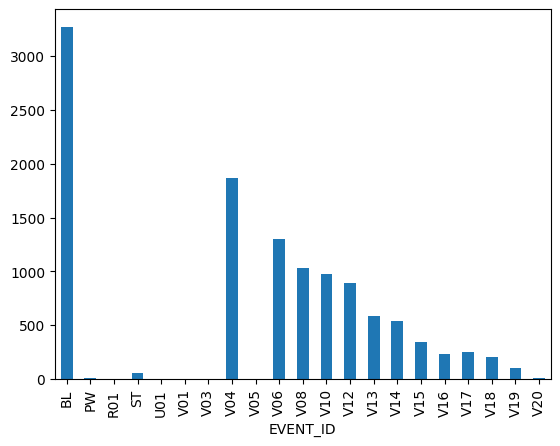

In [42]:
# Number of patients per visit graph
events_series_11 = df_11.groupby(['EVENT_ID']).EVENT_ID.count()
print(events_series_11)

events_series_11.plot.bar()
# Not many responses from the few initial visits

### State-Trait Anxiety Inventory for Adults
Neurobehavioral Test. The State-Trait Anxiety Inventory (STAI) is a psychological inventory based on a 4-point Likert scale and consists of 40 questions on a self-report basis.

As a general observation, the curated dataset sums up values in a lot of sheets. We can also resort to that kind of aggregation. This sheet contains the 40 questions and their results. The questions are in the file `non-motor12`. Questions like I feel calm, I feel tensed. So we can't really sum the scores up because there are negative and positive questions. (1 is very less and 3 is very much).

In [43]:
file = os.path.join(path, "State-Trait_Anxiety_Inventory.csv")
df_12 = pd.read_csv(file)
print("Total number of rows are:",len(df_12))
df_12.head(3)

Total number of rows are: 13634


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,STAIAD1,STAIAD2,STAIAD3,STAIAD4,STAIAD5,...,STAIAD33,STAIAD34,STAIAD35,STAIAD36,STAIAD37,STAIAD38,STAIAD39,STAIAD40,ORIG_ENTRY,LAST_UPDATE
0,272457301,3000,BL,STAI,02/2011,3.0,3.0,1.0,1.0,3.0,...,3.0,3.0,2.0,3.0,1.0,2.0,4.0,2.0,02/2011,2020-06-25 16:02:19.0
1,338705301,3000,V04,STAI,03/2012,3.0,4.0,1.0,1.0,4.0,...,4.0,3.0,2.0,4.0,2.0,2.0,4.0,1.0,03/2012,2020-06-25 16:02:22.0
2,385013601,3000,V06,STAI,02/2013,2.0,3.0,3.0,1.0,3.0,...,4.0,4.0,1.0,4.0,2.0,2.0,4.0,2.0,02/2013,2020-06-25 16:02:22.0


Text(0, 0.5, 'Number of instances')

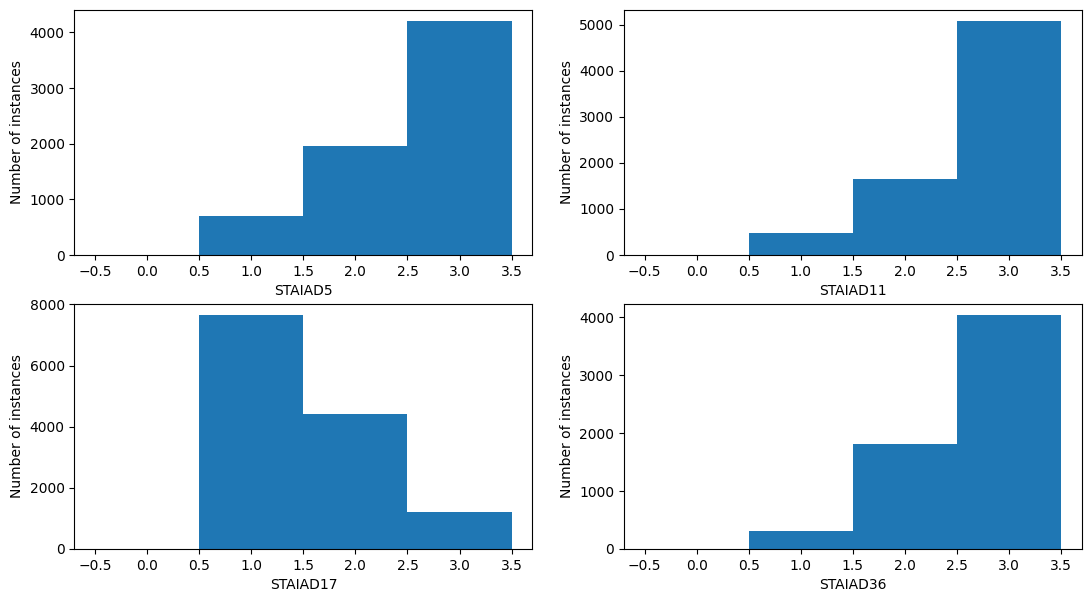

In [44]:
# Distribution of scores for 4 randomly picked questions
# First two are positive and the next two negative
plt.figure(figsize=(13,7))
plt.subplot(2,2,1)
plt.hist(df_12.STAIAD5.dropna(), bins=np.arange(0,5)-0.5)
plt.xlabel('STAIAD5')
plt.ylabel('Number of instances')

plt.subplot(2,2,2)
plt.hist(df_12.STAIAD11.dropna(), bins=np.arange(0,5)-0.5)
plt.xlabel('STAIAD11')
plt.ylabel('Number of instances')

plt.subplot(2,2,3)
plt.hist(df_12.STAIAD17.dropna(), bins=np.arange(0,5)-0.5)
plt.xlabel('STAIAD17')
plt.ylabel('Number of instances')

plt.subplot(2,2,4)
plt.hist(df_12.STAIAD36.dropna(), bins=np.arange(0,5)-0.5)
plt.xlabel('STAIAD36')
plt.ylabel('Number of instances')

EVENT_ID
BL     3217
PW        8
R01       2
SC      381
ST      203
U01       2
V01       9
V02    1033
V03       3
V04    1880
V05       3
V06    1352
V08    1086
V10    1033
V12     942
V13     622
V14     573
V15     381
V16     266
V17     282
V18     229
V19     112
V20      15
Name: EVENT_ID, dtype: int64


<Axes: xlabel='EVENT_ID'>

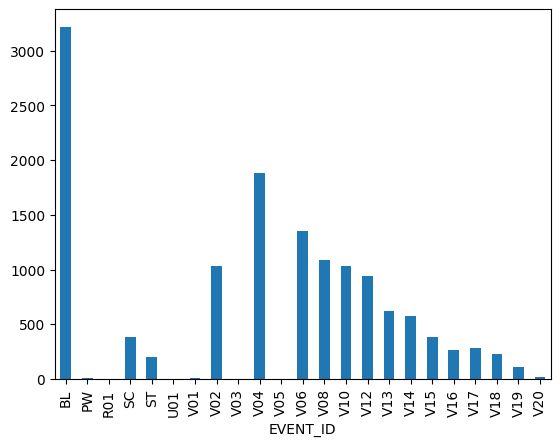

In [45]:
# Number of patients per visit graph
events_series_12 = df_12.groupby(['EVENT_ID']).EVENT_ID.count()
print(events_series_12)


events_series_12.plot.bar()

### Symbol Digit Modalities
Neuropsychological Test. Similar to semantic fluency, there is a derived scaled score and T score. The derived scores seem to be important. Even the total score can be used as a feature

In [46]:
file = os.path.join(path, "Symbol_Digit_Modalities.csv")
df_13 = pd.read_csv(file)
print("Total number of rows are:",len(df_13))
df_13.head(3)

Total number of rows are: 11626


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,SDMTOTAL,SDMTVRSN,AGE_ASSESS_SDM,DVSD_SDM,DVT_SDM,ORIG_ENTRY,LAST_UPDATE
0,272456101,3000,BL,SDM,02/2011,53.0,1.0,69.0,0.833,58.33,02/2011,2020-06-25 16:02:19.0
1,338704301,3000,V04,SDM,03/2012,55.0,2.0,70.0,1.000,60.00,03/2012,2020-06-25 16:02:22.0
2,385012201,3000,V06,SDM,02/2013,51.0,1.0,71.0,0.667,56.67,02/2013,2020-06-25 16:02:22.0


Text(0, 0.5, 'Number of instances')

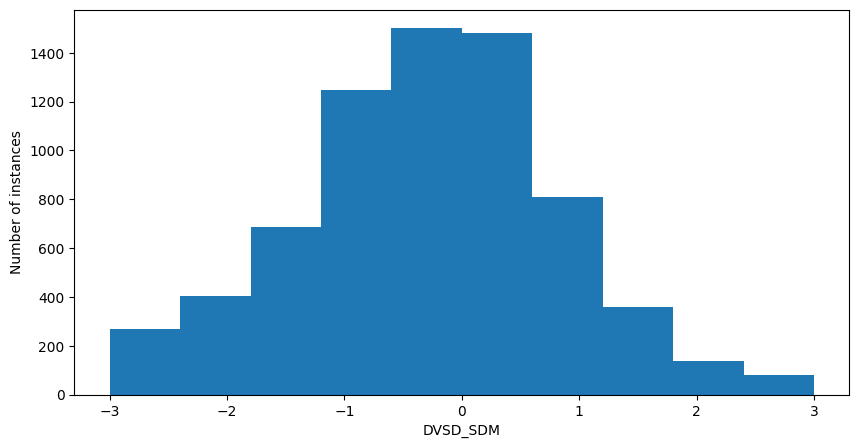

In [47]:
# DVSD_SDM - Scaled score
plt.figure(figsize=(10,5))
plt.hist(df_13.DVSD_SDM.dropna())
plt.xlabel('DVSD_SDM')
plt.ylabel('Number of instances')

Text(0, 0.5, 'Number of instances')

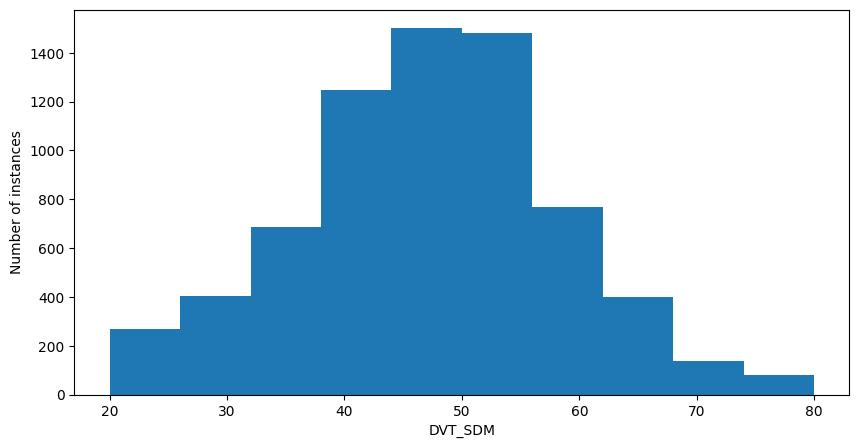

In [48]:
# DVT_SDM - T-score
plt.figure(figsize=(10,5))
plt.hist(df_13.DVT_SDM.dropna())
plt.xlabel('DVT_SDM')
plt.ylabel('Number of instances')

Text(0, 0.5, 'Number of instances')

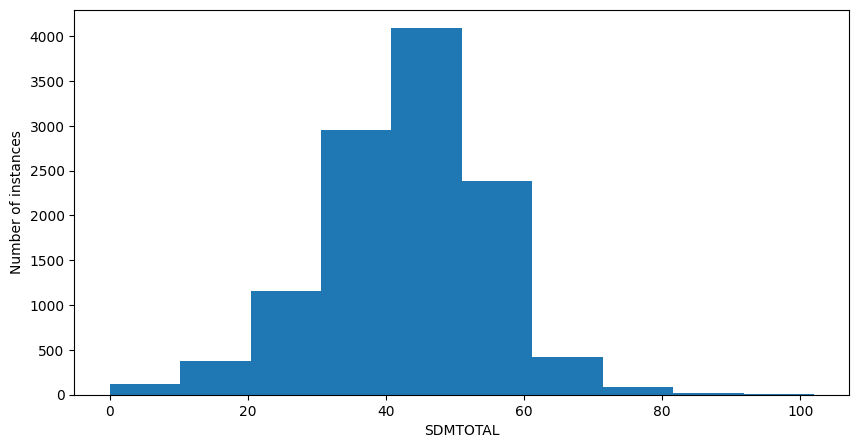

In [49]:
# SDMTOTAL
plt.figure(figsize=(10,5))
plt.hist(df_13.SDMTOTAL.dropna())
plt.xlabel('SDMTOTAL')
plt.ylabel('Number of instances')

Text(0, 0.5, 'Number of instances')

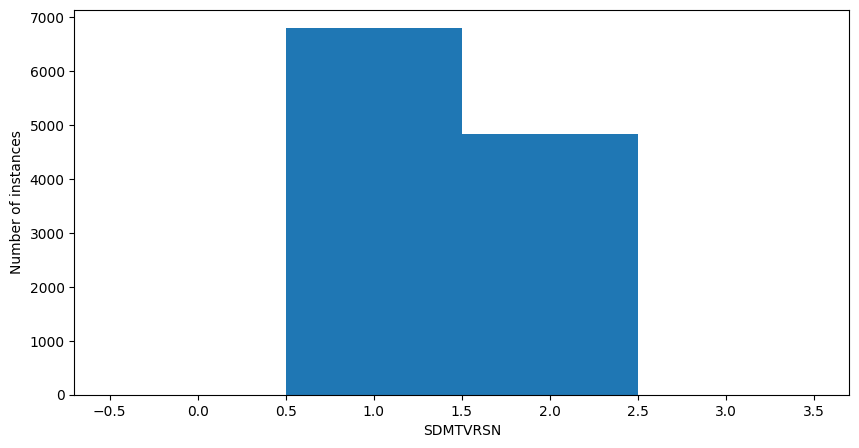

In [50]:
# SDMTVRSN
plt.figure(figsize=(10,5))
plt.hist(df_13.SDMTVRSN.dropna(), bins=np.arange(0,5)-0.5)
plt.xlabel('SDMTVRSN')
plt.ylabel('Number of instances')

EVENT_ID
BL     3268
PW        5
ST       56
U01       1
V01       2
V03       2
V04    1857
V05       3
V06    1297
V08    1024
V10     970
V12     889
V13     576
V14     539
V15     348
V16     227
V17     250
V18     202
V19      98
V20      12
Name: EVENT_ID, dtype: int64


<Axes: xlabel='EVENT_ID'>

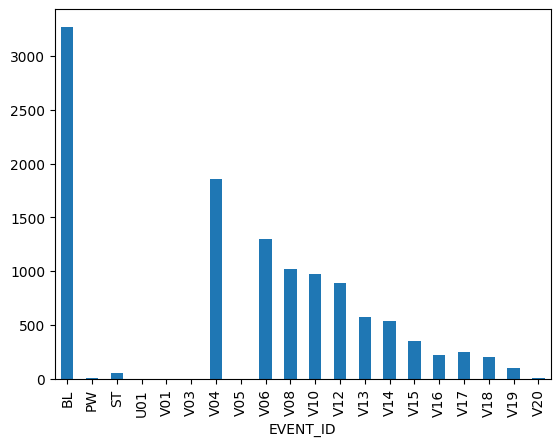

In [51]:
# Number of patients per visit graph
events_series_13 = df_13.groupby(['EVENT_ID']).EVENT_ID.count()
print(events_series_13)

events_series_13.plot.bar()
# Again very few results for the initial screening and such preliminary visits.

## From here we will work on processing each file and writing all the information to a single DF

In [52]:
# df_13 is sdmt dataframe
df_13.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,SDMTOTAL,SDMTVRSN,AGE_ASSESS_SDM,DVSD_SDM,DVT_SDM,ORIG_ENTRY,LAST_UPDATE
0,272456101,3000,BL,SDM,02/2011,53.0,1.0,69.0,0.833,58.33,02/2011,2020-06-25 16:02:19.0
1,338704301,3000,V04,SDM,03/2012,55.0,2.0,70.0,1.000,60.00,03/2012,2020-06-25 16:02:22.0
2,385012201,3000,V06,SDM,02/2013,51.0,1.0,71.0,0.667,56.67,02/2013,2020-06-25 16:02:22.0


In [53]:
df_13.columns

Index(['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'SDMTOTAL',
       'SDMTVRSN', 'AGE_ASSESS_SDM', 'DVSD_SDM', 'DVT_SDM', 'ORIG_ENTRY',
       'LAST_UPDATE'],
      dtype='object')

In [54]:
df_processed = df_13[['PATNO', 'EVENT_ID', 'INFODT', 'SDMTOTAL']] 
df_processed.head(3)

,PATNO,EVENT_ID,INFODT,SDMTOTAL
0,3000,BL,02/2011,53.0
1,3000,V04,03/2012,55.0
2,3000,V06,02/2013,51.0


In [55]:
df_processed.SDMTOTAL.isnull().sum()

9

In [56]:
df_processed[df_processed.SDMTOTAL.isnull()]

,PATNO,EVENT_ID,INFODT,SDMTOTAL
395,3076,V08,03/2015,NaN
807,3173,V08,01/2015,NaN
4054,3856,V14,08/2018,NaN
4055,3856,V15,08/2019,NaN
4121,3870,V14,11/2019,NaN
4468,4021,V15,03/2020,NaN
5710,40775,BL,10/2015,NaN
5711,40775,V10,08/2019,NaN
7065,52523,BL,02/2016,NaN


In [57]:
# Processing the feature for df_12 - State Trait Anxiety Index (STAI)

# Guidelines:
# STAIAD1 - STAIAD40.  
# Add values for the following questions:  
# 3, 4, 6, 7, 9, 12, 13, 14, 17, 18, 22, 24, 25, 28, 29, 31, 32, 35, 37, 38, 40.  
# Use reverse scoring for the remaining questions and add to the first score 
# (e.g., if value = 1, add 4 points to score; if value = 2, add 3 points to score, etc).
df_12.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,STAIAD1,STAIAD2,STAIAD3,STAIAD4,STAIAD5,...,STAIAD33,STAIAD34,STAIAD35,STAIAD36,STAIAD37,STAIAD38,STAIAD39,STAIAD40,ORIG_ENTRY,LAST_UPDATE
0,272457301,3000,BL,STAI,02/2011,3.0,3.0,1.0,1.0,3.0,...,3.0,3.0,2.0,3.0,1.0,2.0,4.0,2.0,02/2011,2020-06-25 16:02:19.0
1,338705301,3000,V04,STAI,03/2012,3.0,4.0,1.0,1.0,4.0,...,4.0,3.0,2.0,4.0,2.0,2.0,4.0,1.0,03/2012,2020-06-25 16:02:22.0
2,385013601,3000,V06,STAI,02/2013,2.0,3.0,3.0,1.0,3.0,...,4.0,4.0,1.0,4.0,2.0,2.0,4.0,2.0,02/2013,2020-06-25 16:02:22.0


In [58]:
# Define a function to get the final STAI
add_stai = [3, 4, 6, 7, 9, 12, 13, 14, 17, 18, 22, 24, 25, 28, 29, 31, 32, 35, 37, 38, 40]
stai_set = set()
for v in add_stai:
    s='STAIAD'+str(v)
    stai_set.add(s)
print(stai_set)

rev_stai = list(range(41))
for i in add_stai:
    rev_stai.remove(i)
print(rev_stai)

stai_rev_set = set()
for v in rev_stai:
    if v==0:
        continue
    s='STAIAD'+str(v)
    stai_rev_set.add(s)
print(stai_rev_set)

{'STAIAD35', 'STAIAD29', 'STAIAD37', 'STAIAD3', 'STAIAD32', 'STAIAD17', 'STAIAD9', 'STAIAD13', 'STAIAD7', 'STAIAD24', 'STAIAD22', 'STAIAD4', 'STAIAD40', 'STAIAD38', 'STAIAD28', 'STAIAD6', 'STAIAD25', 'STAIAD18', 'STAIAD14', 'STAIAD12', 'STAIAD31'}
[0, 1, 2, 5, 8, 10, 11, 15, 16, 19, 20, 21, 23, 26, 27, 30, 33, 34, 36, 39]
{'STAIAD21', 'STAIAD34', 'STAIAD10', 'STAIAD15', 'STAIAD27', 'STAIAD11', 'STAIAD16', 'STAIAD30', 'STAIAD2', 'STAIAD39', 'STAIAD26', 'STAIAD1', 'STAIAD36', 'STAIAD5', 'STAIAD23', 'STAIAD8', 'STAIAD20', 'STAIAD33', 'STAIAD19'}


In [59]:
import math
df_12_columns = df_12.columns
def stai_total(row):
    # iterate over the keys
    sum = 0
    for key in df_12_columns:
        if key in stai_set:
            if math.isnan(row[key]):
                return row[key] 
            sum+=int(row[key])
        elif key in stai_rev_set:
            if math.isnan(row[key]):
                return row[key]
            sum+=(5-int(row[key]))
    return sum

In [60]:
df_12['STAI_TOT'] = df_12.apply(stai_total,axis=1)
df_12.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,STAIAD1,STAIAD2,STAIAD3,STAIAD4,STAIAD5,...,STAIAD34,STAIAD35,STAIAD36,STAIAD37,STAIAD38,STAIAD39,STAIAD40,ORIG_ENTRY,LAST_UPDATE,STAI_TOT
0,272457301,3000,BL,STAI,02/2011,3.0,3.0,1.0,1.0,3.0,...,3.0,2.0,3.0,1.0,2.0,4.0,2.0,02/2011,2020-06-25 16:02:19.0,55.0
1,338705301,3000,V04,STAI,03/2012,3.0,4.0,1.0,1.0,4.0,...,3.0,2.0,4.0,2.0,2.0,4.0,1.0,03/2012,2020-06-25 16:02:22.0,58.0
2,385013601,3000,V06,STAI,02/2013,2.0,3.0,3.0,1.0,3.0,...,4.0,1.0,4.0,2.0,2.0,4.0,2.0,02/2013,2020-06-25 16:02:22.0,69.0


In [61]:
df_12.STAI_TOT.isnull().sum()

89

In [62]:
df_processed = pd.merge(left=df_processed, right=df_12[['PATNO','EVENT_ID','INFODT','STAI_TOT']], \
                        how='outer', on=['PATNO','EVENT_ID','INFODT'])
df_processed.head(3)

,PATNO,EVENT_ID,INFODT,SDMTOTAL,STAI_TOT
0,3000,BL,02/2011,53.0,55.0
1,3000,V04,03/2012,55.0,58.0
2,3000,V06,02/2013,51.0,69.0


In [63]:
# Processing the feature for df_11 - Semantic Fluency (SFT)

# Guidelines
# Sum of VLTANIM, VLTVEG, VLTFRUIT
df_11.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,VLTANIM,VLTVEG,VLTFRUIT,AGE_ASSESS_SFTANIM,DVS_SFTANIM,DVT_SFTANIM,ORIG_ENTRY,LAST_UPDATE
0,272452701,3000,BL,SFT,02/2011,28,15.0,22.0,69.0,14.0,62.0,02/2011,2020-06-25 16:02:19.0
1,338703901,3000,V04,SFT,03/2012,22,19.0,18.0,70.0,11.0,52.0,03/2012,2020-06-25 16:02:22.0
2,385011601,3000,V06,SFT,02/2013,23,25.0,15.0,71.0,12.0,56.0,02/2013,2020-06-25 16:02:22.0


In [64]:
df_11['SFT_TOT'] = df_11[['VLTANIM','VLTVEG','VLTFRUIT']].sum(axis=1)

In [65]:
df_11.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,VLTANIM,VLTVEG,VLTFRUIT,AGE_ASSESS_SFTANIM,DVS_SFTANIM,DVT_SFTANIM,ORIG_ENTRY,LAST_UPDATE,SFT_TOT
0,272452701,3000,BL,SFT,02/2011,28,15.0,22.0,69.0,14.0,62.0,02/2011,2020-06-25 16:02:19.0,65.0
1,338703901,3000,V04,SFT,03/2012,22,19.0,18.0,70.0,11.0,52.0,03/2012,2020-06-25 16:02:22.0,59.0
2,385011601,3000,V06,SFT,02/2013,23,25.0,15.0,71.0,12.0,56.0,02/2013,2020-06-25 16:02:22.0,63.0


In [66]:
df_processed = pd.merge(left=df_processed, right=df_11[['PATNO','EVENT_ID','INFODT','SFT_TOT']], \
                        how='outer', on=['PATNO','EVENT_ID','INFODT'])
df_processed.head(3)

,PATNO,EVENT_ID,INFODT,SDMTOTAL,STAI_TOT,SFT_TOT
0,3000,BL,02/2011,53.0,55.0,65.0
1,3000,V04,03/2012,55.0,58.0,59.0
2,3000,V06,02/2013,51.0,69.0,63.0


In [67]:
# Processing the feature for df_10 - SCOPA-AUT

# Guidelines
# SCAU1 - SCAU25.  
# For questions 1-21 (SCAU1 - SCAU21), add 3 points for each response of "9". 
# Otherwise, add the number of points in response.  
# For questions 22-25 (SCAU22 - SCAU25), add 0 points for each respµonse of "9". 
# Otherwise, add the number of points in response.

# Since there are different tests done for male/female. We will take nan=0µb
df_10.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,SCAU1,SCAU2,SCAU3,SCAU4,...,SCAU26A,SCAU26AT,SCAU26B,SCAU26BT,SCAU26C,SCAU26CT,SCAU26D,SCAU26DT,ORIG_ENTRY,LAST_UPDATE
0,272459401,3000,BL,SCOPAAUT,02/2011,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,1.0,Lisinopril/Hydrochlorothiazide,0.0,NaN,02/2011,2020-06-25 16:02:19.0
1,338705801,3000,V04,SCOPAAUT,03/2012,1.0,0.0,0.0,0.0,0.0,...,1.0,fish oil,0.0,NaN,1.0,HCTZ,0.0,NaN,03/2012,2020-06-25 16:02:22.0
2,385014301,3000,V06,SCOPAAUT,02/2013,1.0,0.0,0.0,0.0,0.0,...,1.0,"flax seed, fish oil",0.0,NaN,1.0,"HCTZ, lisinopril",0.0,NaN,02/2013,2020-06-25 16:02:22.0


In [68]:
add_sa = list(range(1,26))
sa_1 = set()
sa_2 = set()
for v in add_sa:
    s='SCAU'+str(v)
    if v in [22,23,24,25]:
        sa_2.add(s)
    else:
        sa_1.add(s)
print(sa_1)
print(sa_2)

{'SCAU20', 'SCAU6', 'SCAU2', 'SCAU4', 'SCAU10', 'SCAU9', 'SCAU21', 'SCAU3', 'SCAU16', 'SCAU17', 'SCAU11', 'SCAU5', 'SCAU19', 'SCAU1', 'SCAU14', 'SCAU13', 'SCAU15', 'SCAU12', 'SCAU18', 'SCAU7', 'SCAU8'}
{'SCAU24', 'SCAU23', 'SCAU25', 'SCAU22'}


In [69]:
df_10_columns = df_10.columns
def scopa_total(row):
    # iterate over the keys
    sum = 0
    for key in df_10_columns:
        if key in sa_1:
            if math.isnan(row[key]):
                continue
            if int(row[key])==9:
                sum+=3
            else:
                sum+=int(row[key])
        if key in sa_2:
            if math.isnan(row[key]):
                continue
            if int(row[key])==9:
                sum+=0
            else:
                sum+=int(row[key])
    return sum

In [70]:
df_10['SCOPA_AUT_TOT'] = df_10.apply(scopa_total,axis=1)
df_10.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,SCAU1,SCAU2,SCAU3,SCAU4,...,SCAU26AT,SCAU26B,SCAU26BT,SCAU26C,SCAU26CT,SCAU26D,SCAU26DT,ORIG_ENTRY,LAST_UPDATE,SCOPA_AUT_TOT
0,272459401,3000,BL,SCOPAAUT,02/2011,1.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,1.0,Lisinopril/Hydrochlorothiazide,0.0,NaN,02/2011,2020-06-25 16:02:19.0,5
1,338705801,3000,V04,SCOPAAUT,03/2012,1.0,0.0,0.0,0.0,0.0,...,fish oil,0.0,NaN,1.0,HCTZ,0.0,NaN,03/2012,2020-06-25 16:02:22.0,7
2,385014301,3000,V06,SCOPAAUT,02/2013,1.0,0.0,0.0,0.0,0.0,...,"flax seed, fish oil",0.0,NaN,1.0,"HCTZ, lisinopril",0.0,NaN,02/2013,2020-06-25 16:02:22.0,7


In [71]:
df_processed = pd.merge(left=df_processed, right=df_10[['PATNO','EVENT_ID','INFODT','SCOPA_AUT_TOT']], \
                        how='outer', on=['PATNO','EVENT_ID','INFODT'])
df_processed.head(3)

,PATNO,EVENT_ID,INFODT,SDMTOTAL,STAI_TOT,SFT_TOT,SCOPA_AUT_TOT
0,3000,BL,02/2011,53.0,55.0,65.0,5.0
1,3000,V04,03/2012,55.0,58.0,59.0,7.0
2,3000,V06,02/2013,51.0,69.0,63.0,7.0


In [72]:
# Processing the feature for df_9 - REM Sleep Behavior Questionnaire (REMSLEEP)

# Guidelines
# Add 1 point for each response of "Yes" (1) 
# to any of the following variables:  DRMVIVID, DRMAGRAC, DRMNOCTB, SLPLMBMV, SLPINJUR, 
# DRMVERBL, DRMFIGHT, DRMUMV, DRMOBJFL, MVAWAKEN, DRMREMEM, SLPDSTRB.  
# Add 1 point if any of the following variables has a response of "Yes" (1):  
# STROKE, HETRA, PARKISM, RLS, NARCLPSY, DEPRS, EPILEPSY, BRNINFM, CNSOTH.  
# If any of the previous variables are missing, then RBD score is missing.  
# Subjects with score >=5 are RBD Positive.  Subjects with score <5 are RBD Negative.

# Also checked the curated file - If any of the variables are nan they don't really have a summary score
# So just putting nan for those for now
df_9.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,DRMVIVID,DRMAGRAC,DRMNOCTB,SLPLMBMV,...,HETRA,PARKISM,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM,CNSOTH,ORIG_ENTRY,LAST_UPDATE
0,272456701,3000,BL,REMSLEEP,02/2011,1.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,02/2011,2020-06-25 16:02:19.0
1,338704901,3000,V04,REMSLEEP,03/2012,1.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,03/2012,2020-06-25 16:02:22.0
2,385013101,3000,V06,REMSLEEP,02/2013,1.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,02/2013,2020-06-25 16:02:22.0


In [73]:
rs_set = set(["DRMVIVID","DRMAGRAC","DRMNOCTB","SLPLMBMV","SLPINJUR",
              "DRMVERBL","DRMFIGHT","DRMUMV","DRMOBJFL","MVAWAKEN",
              "DRMREMEM","SLPDSTRB","STROKE","HETRA","PARKISM","RLS",
              "NARCLPSY","DEPRS","EPILEPSY","BRNINFM","CNSOTH"])

In [74]:
def rem_sleep_total(row):
    # iterate over the keys
    sum = 0
    for key in rs_set:
        if math.isnan(row[key]):
            return row[key] 
        sum+=int(row[key])
    return sum

In [75]:
df_9['REMSLEEP_TOT'] = df_9.apply(rem_sleep_total,axis=1)
df_9.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,DRMVIVID,DRMAGRAC,DRMNOCTB,SLPLMBMV,...,PARKISM,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM,CNSOTH,ORIG_ENTRY,LAST_UPDATE,REMSLEEP_TOT
0,272456701,3000,BL,REMSLEEP,02/2011,1.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,02/2011,2020-06-25 16:02:19.0,0.0
1,338704901,3000,V04,REMSLEEP,03/2012,1.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,03/2012,2020-06-25 16:02:22.0,0.0
2,385013101,3000,V06,REMSLEEP,02/2013,1.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,02/2013,2020-06-25 16:02:22.0,0.0


In [76]:
df_9.REMSLEEP_TOT.isnull().sum()

62

In [77]:
df_processed = pd.merge(left=df_processed, right=df_9[['PATNO','EVENT_ID','INFODT','REMSLEEP_TOT']], \
                        how='outer', on=['PATNO','EVENT_ID','INFODT'])
df_processed.head(3)

,PATNO,EVENT_ID,INFODT,SDMTOTAL,STAI_TOT,SFT_TOT,SCOPA_AUT_TOT,REMSLEEP_TOT
0,3000,BL,02/2011,53.0,55.0,65.0,5.0,0.0
1,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0
2,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0


In [78]:
# Processing the feature for df_8 - QUIPCS

# Guidelines
# For Sections A - D, add 1 point 
# if either question has a response of "Yes" (1):  
# Section A:  CNTRLGMB, TMGAMBLE; Section B:  CNTRLSEX, TMSEX; 
# Section C:  CNTRLBUY, TMBUY; Section D:  CNTRLEAT, TMEAT.  
# For Section E, add 1 point for each response of "Yes" (1):  
# TMTORACT, TMTMTACT, TMTRWD.

# A-D: Will be 1 if either or both have Yes. Otherwise 0
# E: We will add across the three questions
# So we will have multiple columns for this feature

# NaN if anything for that particular question is missing

In [79]:
df_8.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTINBOTH,TMGAMBLE,CNTRLGMB,TMSEX,CNTRLSEX,...,CNTRLBUY,TMEAT,CNTRLEAT,TMTORACT,TMTMTACT,TMTRWD,TMDISMED,CNTRLDSM,ORIG_ENTRY,LAST_UPDATE
0,272459201,3000,BL,QUIPCS,02/2011,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,02/2011,2020-06-25 16:02:19.0
1,338705501,3000,V04,QUIPCS,03/2012,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,03/2012,2020-06-25 16:02:22.0
2,385014001,3000,V06,QUIPCS,02/2013,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,02/2013,2020-06-25 16:02:22.0


In [80]:
# df_8['elderly'] = np.where((df['age']>=50), 1.0, 0.0)
# df_8['QUIP_A'] = df_8.apply(lambda x: 1.0 if (x['CNTRLGMB']==1.0 or x['TMGAMBLE']==1.0) else 0.0, axis=1)
# df_8.head(3)
# Can't use this technique because we won't be able to account for NaNs

In [81]:
# Need to do all this to handle the NaNs :(
def quip_A(x):
    if math.isnan(x['CNTRLGMB']):
        return x['CNTRLGMB']
    if math.isnan(x['TMGAMBLE']):
        return x['TMGAMBLE']
    if x['CNTRLGMB']==1.0 or x['TMGAMBLE']==1.0:
        return 1.0
    else:
        return 0.0
    
def quip_B(x):
    if math.isnan(x['CNTRLSEX']):
        return x['CNTRLSEX']
    if math.isnan(x['TMSEX']):
        return x['TMSEX']
    if x['CNTRLSEX']==1.0 or x['TMSEX']==1.0:
        return 1.0
    else:
        return 0.0
    
def quip_C(x):
    if math.isnan(x['CNTRLBUY']):
        return x['CNTRLBUY']
    if math.isnan(x['TMBUY']):
        return x['TMBUY']
    if x['CNTRLBUY']==1.0 or x['TMBUY']==1.0:
        return 1.0
    else:
        return 0.0
    
def quip_D(x):
    if math.isnan(x['CNTRLEAT']):
        return x['CNTRLEAT']
    if math.isnan(x['TMEAT']):
        return x['TMEAT']
    if x['CNTRLEAT']==1.0 or x['TMEAT']==1.0:
        return 1.0
    else:
        return 0.0

def quip_E(x):
    sum=0
    for col in ["TMTORACT","TMTMTACT","TMTRWD"]:
        if math.isnan(x[col]):
            return x[col]
        if x[col]==1.0:
            sum+=1.0
    return sum

In [82]:
df_8['QUIP_A'] = df_8.apply(quip_A,axis=1)
df_8.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTINBOTH,TMGAMBLE,CNTRLGMB,TMSEX,CNTRLSEX,...,TMEAT,CNTRLEAT,TMTORACT,TMTMTACT,TMTRWD,TMDISMED,CNTRLDSM,ORIG_ENTRY,LAST_UPDATE,QUIP_A
0,272459201,3000,BL,QUIPCS,02/2011,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,02/2011,2020-06-25 16:02:19.0,0.0
1,338705501,3000,V04,QUIPCS,03/2012,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,03/2012,2020-06-25 16:02:22.0,0.0
2,385014001,3000,V06,QUIPCS,02/2013,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,02/2013,2020-06-25 16:02:22.0,0.0


In [83]:
df_8['QUIP_B'] = df_8.apply(quip_B,axis=1)
df_8['QUIP_C'] = df_8.apply(quip_C,axis=1)
df_8['QUIP_D'] = df_8.apply(quip_D,axis=1)
df_8['QUIP_E'] = df_8.apply(quip_E,axis=1)
df_8.head(5)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTINBOTH,TMGAMBLE,CNTRLGMB,TMSEX,CNTRLSEX,...,TMTRWD,TMDISMED,CNTRLDSM,ORIG_ENTRY,LAST_UPDATE,QUIP_A,QUIP_B,QUIP_C,QUIP_D,QUIP_E
0,272459201,3000,BL,QUIPCS,02/2011,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,02/2011,2020-06-25 16:02:19.0,0.0,0.0,0.0,0.0,0.0
1,338705501,3000,V04,QUIPCS,03/2012,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,03/2012,2020-06-25 16:02:22.0,0.0,0.0,0.0,0.0,0.0
2,385014001,3000,V06,QUIPCS,02/2013,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,02/2013,2020-06-25 16:02:22.0,0.0,0.0,0.0,0.0,0.0
3,437138001,3000,V08,QUIPCS,03/2014,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,05/2014,2020-06-25 16:02:22.0,0.0,0.0,0.0,0.0,0.0
4,512466101,3000,V10,QUIPCS,03/2015,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,03/2015,2020-06-25 16:02:23.0,0.0,0.0,0.0,0.0,0.0


In [84]:
df_processed = pd.merge(left=df_processed, right=df_8[['PATNO','EVENT_ID','INFODT','QUIP_A','QUIP_B','QUIP_C','QUIP_D','QUIP_E']], \
                        how='outer', on=['PATNO','EVENT_ID','INFODT'])
df_processed.head(3)

,PATNO,EVENT_ID,INFODT,SDMTOTAL,STAI_TOT,SFT_TOT,SCOPA_AUT_TOT,REMSLEEP_TOT,QUIP_A,QUIP_B,QUIP_C,QUIP_D,QUIP_E
0,3000,BL,02/2011,53.0,55.0,65.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# Processing the feature for df_7 - Olfactory UPSIT
# We will actually load the DF since df_7 has the more granular results
file = os.path.join(path, "University_of_Pennsylvania_Smell_Identification_Test_UPSIT_15Mar2024.csv")
df_upsit = pd.read_csv(file)

# Guidelines
# Sum of UPSITBK1 - UPSITBK4

In [86]:
df_upsit.isnull().sum()[80:90]


SCENT_38_RESPONSE      4
SCENT_39_CORRECT       4
SCENT_39_RESPONSE      4
SCENT_40_CORRECT       5
SCENT_40_RESPONSE      5
TOTAL_CORRECT        297
UPSITFORM              0
UPSIT_PRCNTGE        297
UPSIT_PRCTVER          0
UPSIT_SOURCE           0
dtype: int64

In [87]:
for i in range(1, 41):
    scent_correct_col = f'SCENT_{i}_CORRECT'
    scent_response_col = f'SCENT_{i}_RESPONSE'
    count_col = f'scent_{i}_match_count'
    
    # Count occurrences where response matches correct scent
    match_count = df_upsit.apply(lambda row: 1 if row[scent_response_col] == row[scent_correct_col] else 0, axis=1)
    
    # Store match count in a separate column
    df_upsit[count_col] = match_count

# Summing up match counts for all scents
df_upsit['total_match_count'] = df_upsit[[f'scent_{i}_match_count' for i in range(1, 41)]].sum(axis=1)

In [88]:

print(df_upsit['total_match_count'],df_upsit['TOTAL_CORRECT'])


0        8
1        9
2        7
3        8
4        7
        ..
2015     3
2016    10
2017     5
2018     9
2019     3
Name: total_match_count, Length: 2020, dtype: int64 0        NaN
1        NaN
2       34.0
3       33.0
4        NaN
        ... 
2015    15.0
2016    38.0
2017    21.0
2018    29.0
2019     NaN
Name: TOTAL_CORRECT, Length: 2020, dtype: float64


In [89]:
# df_upsit['UPSIT_TOT'] = df_upsit[['UPSITBK1','UPSITBK2','UPSITBK3','UPSITBK4']].sum(axis=1)
df_upsit.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,SCENT_1_CORRECT,SCENT_1_RESPONSE,SCENT_2_CORRECT,SCENT_2_RESPONSE,SCENT_3_CORRECT,...,scent_32_match_count,scent_33_match_count,scent_34_match_count,scent_35_match_count,scent_36_match_count,scent_37_match_count,scent_38_match_count,scent_39_match_count,scent_40_match_count,total_match_count
0,IA202915,40568,V06,UPSIT,Apr-21,0.0,1.0,1.0,2.0,1.0,...,0,0,0,0,0,1,0,0,1,8
1,IA202916,52927,V06,UPSIT,Aug-21,1.0,2.0,1.0,2.0,1.0,...,0,0,0,0,0,1,0,0,1,9
2,IA346161,52927,V10,UPSIT,Oct-23,1.0,2.0,1.0,2.0,1.0,...,0,0,1,0,0,1,0,0,1,7


In [90]:
df_processed = pd.merge(left=df_processed, right=df_upsit[['PATNO','EVENT_ID','INFODT','total_match_count']], \
                        how='outer', on=['PATNO','EVENT_ID','INFODT'])
df_processed.head(3)

,PATNO,EVENT_ID,INFODT,SDMTOTAL,STAI_TOT,SFT_TOT,SCOPA_AUT_TOT,REMSLEEP_TOT,QUIP_A,QUIP_B,QUIP_C,QUIP_D,QUIP_E,total_match_count
0,3000,BL,02/2011,53.0,55.0,65.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [91]:
# Processing the feature for df_6 - Montreal Cognitive Assessment (MoCA)

# Guidelines
# Unadjusted Score = sum of MCAALTTM, MCACUBE, MCACLCKC, MCACLCKN, MCACLCKH, 
# MCALION,  MCARHINO, MCACAMEL, MCAFDS, MCABDS, MCAVIGIL, MCASER7, MCASNTNC, 
# MCAVF, MCAABSTR, MCAREC1, MCAREC2, MCAREC3, MCAREC4, MCAREC5, MCADATE, MCAMONTH, 
# MCAYR, MCADAY, MCAPLACE, MCACTY.  If EDUCYRS <=12 
# and Unadjusted Score < 30, add 1 more point to score.  
# If EDUCYRS > 12, do not add any more points to score.

In [92]:
df_6.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,MCAALTTM,MCACUBE,MCACLCKC,MCACLCKN,MCACLCKH,...,MCAREC5,MCADATE,MCAMONTH,MCAYR,MCADAY,MCAPLACE,MCACITY,MCATOT,ORIG_ENTRY,LAST_UPDATE
0,269556101,3000,SC,MOCA,01/2011,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,27.0,01/2011,2020-06-25 16:02:21.0
1,338704501,3000,V04,MOCA,03/2012,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,29.0,03/2012,2020-06-25 16:02:21.0
2,385012501,3000,V06,MOCA,02/2013,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,28.0,02/2013,2020-06-25 16:02:22.0


In [93]:
# Loading the socio-eco table in
file = os.path.join(path, "Socio-Economics.csv")
df_se = pd.read_csv(file)
df_se.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,EDUCYRS,ORIG_ENTRY,LAST_UPDATE
0,269536901,3000,SC,SOCIOECO,01/2011,18.0,01/2011,2020-06-25 16:02:21.0
1,IA94031,3000,TRANS,SOCIOECO,05/2021,18.0,06/2021,2022-11-07 00:00:00.0
2,274783701,3001,SC,SOCIOECO,02/2011,16.0,02/2011,2020-06-25 16:04:32.0


In [146]:
df_6_se = pd.merge(left=df_6, right=df_se[['PATNO','EDUCYRS']], \
                        on=['PATNO'])
df_6_se.sample(10)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,MCAALTTM,MCACUBE,MCACLCKC,MCACLCKN,MCACLCKH,...,MCADATE,MCAMONTH,MCAYR,MCADAY,MCAPLACE,MCACITY,MCATOT,ORIG_ENTRY,LAST_UPDATE,EDUCYRS
235,521083401,3021,V08,MOCA,04/2015,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,27.0,05/2015,2020-06-30 09:25:49.0,12.0
6535,IA120900,3816,V17,MOCA,11/2021,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,26.0,12/2021,2021-12-27 00:00:00.0,14.0
7144,639890601,3914,V10,MOCA,04/2017,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,28.0,06/2017,2020-06-26 18:43:32.0,20.0
10193,698550901,41305,V08,MOCA,07/2018,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,27.0,07/2018,2020-06-30 17:14:36.0,20.0
14195,649965701,58767,SC,MOCA,07/2017,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,26.0,08/2017,2020-06-30 14:51:07.0,18.0
16971,IA232670,111459,BL,MOCA,11/2022,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,28.0,02/2023,2023-02-21 00:00:00.0,18.0
12652,IA120464,52927,V06,MOCA,08/2021,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,08/2021,2021-08-25 00:00:00.0,16.0
2618,743014101,3360,V15,MOCA,02/2019,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,24.0,06/2019,2020-06-26 13:19:49.0,16.0
2586,283665901,3358,SC,MOCA,03/2011,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,30.0,03/2011,2020-01-13 12:56:49.0,15.0
18534,IA246779,213954,BL,MOCA,03/2023,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,27.0,03/2023,2023-03-23 00:00:00.0,18.0


In [148]:
df_6_se['Unadjusted_TOT'] = df_6_se[["MCAALTTM","MCACUBE","MCACLCKC","MCACLCKN",\
                                     "MCACLCKH","MCALION","MCARHINO","MCACAMEL",\
                                     "MCAFDS","MCABDS","MCAVIGIL","MCASER7","MCASNTNC",\
                                     "MCAVF","MCAABSTR","MCAREC1","MCAREC2","MCAREC3",\
                                     "MCAREC4","MCAREC5","MCADATE","MCAMONTH","MCAYR",\
                                     "MCADAY","MCAPLACE","MCACITY"]].sum(axis=1)

In [149]:
df_6_se.sample(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,MCAALTTM,MCACUBE,MCACLCKC,MCACLCKN,MCACLCKH,...,MCAMONTH,MCAYR,MCADAY,MCAPLACE,MCACITY,MCATOT,ORIG_ENTRY,LAST_UPDATE,EDUCYRS,Unadjusted_TOT
16266,IA420638,75525,V12,MOCA,02/2024,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,30.0,02/2024,2024-02-13 00:00:00.0,15.0,30.0
11784,546794101,50829,V04,MOCA,12/2015,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,25.0,12/2015,2020-06-26 19:01:57.0,17.0,25.0
10967,IA121144,42306,V12,MOCA,07/2021,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,29.0,07/2021,2021-07-13 00:00:00.0,12.0,28.0


In [150]:
df_6_se.Unadjusted_TOT.isnull().sum()

0

In [98]:
a=np.where(((df_6_se['Unadjusted_TOT']<30) & (df_6_se['EDUCYRS']<=12)), df_6_se['Unadjusted_TOT']+1, df_6_se['Unadjusted_TOT'])

In [99]:
print(len(a),len(df_6_se))

19204 19204


In [100]:
df_6_se['MoCA_score'] = a
df_6_se.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,MCAALTTM,MCACUBE,MCACLCKC,MCACLCKN,MCACLCKH,...,MCAYR,MCADAY,MCAPLACE,MCACITY,MCATOT,ORIG_ENTRY,LAST_UPDATE,EDUCYRS,Unadjusted_TOT,MoCA_score
0,269556101,3000,SC,MOCA,01/2011,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,27.0,01/2011,2020-06-25 16:02:21.0,18.0,27.0,27.0
1,269556101,3000,SC,MOCA,01/2011,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,27.0,01/2011,2020-06-25 16:02:21.0,18.0,27.0,27.0
2,338704501,3000,V04,MOCA,03/2012,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,29.0,03/2012,2020-06-25 16:02:21.0,18.0,29.0,29.0


In [101]:
df_6_se[((df_6_se['Unadjusted_TOT']<30) & (df_6_se['EDUCYRS']<=12))][:3]

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,MCAALTTM,MCACUBE,MCACLCKC,MCACLCKN,MCACLCKH,...,MCAYR,MCADAY,MCAPLACE,MCACITY,MCATOT,ORIG_ENTRY,LAST_UPDATE,EDUCYRS,Unadjusted_TOT,MoCA_score
229,341548401,3021,SC,MOCA,03/2012,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,29.0,04/2012,2020-06-30 09:25:25.0,12.0,28.0,29.0
230,341548401,3021,SC,MOCA,03/2012,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,29.0,04/2012,2020-06-30 09:25:25.0,12.0,28.0,29.0
231,400594401,3021,V04,MOCA,06/2013,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,28.0,06/2013,2020-06-30 09:25:36.0,12.0,27.0,28.0


In [102]:
df_6_se.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,MCAALTTM,MCACUBE,MCACLCKC,MCACLCKN,MCACLCKH,...,MCAYR,MCADAY,MCAPLACE,MCACITY,MCATOT,ORIG_ENTRY,LAST_UPDATE,EDUCYRS,Unadjusted_TOT,MoCA_score
0,269556101,3000,SC,MOCA,01/2011,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,27.0,01/2011,2020-06-25 16:02:21.0,18.0,27.0,27.0
1,269556101,3000,SC,MOCA,01/2011,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,27.0,01/2011,2020-06-25 16:02:21.0,18.0,27.0,27.0
2,338704501,3000,V04,MOCA,03/2012,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,29.0,03/2012,2020-06-25 16:02:21.0,18.0,29.0,29.0


In [103]:
df_processed = pd.merge(left=df_processed, right=df_6_se[['PATNO','EVENT_ID','INFODT','MoCA_score']], \
                        how='outer', on=['PATNO','EVENT_ID','INFODT'])
df_processed.head(5)

,PATNO,EVENT_ID,INFODT,SDMTOTAL,STAI_TOT,SFT_TOT,SCOPA_AUT_TOT,REMSLEEP_TOT,QUIP_A,QUIP_B,QUIP_C,QUIP_D,QUIP_E,total_match_count,MoCA_score
0,3000,BL,02/2011,53.0,55.0,65.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,29.0
2,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,29.0
3,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,28.0
4,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,28.0


In [104]:
# Processing the feature for df_5 - Letter Number Sequencing (LNSPD)

# Guidelines
# Sum of LNS1A - LNS7C
df_5.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,LNS1A,LNS1B,LNS1C,LNS2A,LNS2B,...,LNS6B,LNS6C,LNS7A,LNS7B,LNS7C,LNS_TOTRAW,AGE_ASSESS_LNS,DVS_LNS,ORIG_ENTRY,LAST_UPDATE
0,272452901,3000,BL,LNSPD,02/2011,1,1,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,14.0,69.0,15.0,02/2011,2020-06-25 16:02:19.0
1,338704101,3000,V04,LNSPD,03/2012,1,1,1.0,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,14.0,70.0,16.0,03/2012,2020-06-25 16:02:21.0
2,385012001,3000,V06,LNSPD,02/2013,1,1,1.0,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,13.0,71.0,15.0,02/2013,2020-06-25 16:02:22.0


In [105]:
df_5['LNS_TOT'] = df_5[["LNS1A","LNS1B","LNS1C","LNS2A","LNS2B","LNS2C","LNS3A","LNS3B",
       "LNS3C","LNS4A","LNS4B","LNS4C","LNS5A","LNS5B","LNS5C","LNS6A",
       "LNS6B","LNS6C","LNS7A","LNS7B","LNS7C"]].sum(axis=1)

In [106]:
df_5.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,LNS1A,LNS1B,LNS1C,LNS2A,LNS2B,...,LNS6C,LNS7A,LNS7B,LNS7C,LNS_TOTRAW,AGE_ASSESS_LNS,DVS_LNS,ORIG_ENTRY,LAST_UPDATE,LNS_TOT
0,272452901,3000,BL,LNSPD,02/2011,1,1,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,14.0,69.0,15.0,02/2011,2020-06-25 16:02:19.0,14.0
1,338704101,3000,V04,LNSPD,03/2012,1,1,1.0,1.0,1.0,...,0.0,NaN,NaN,NaN,14.0,70.0,16.0,03/2012,2020-06-25 16:02:21.0,14.0
2,385012001,3000,V06,LNSPD,02/2013,1,1,1.0,1.0,1.0,...,0.0,NaN,NaN,NaN,13.0,71.0,15.0,02/2013,2020-06-25 16:02:22.0,13.0


In [107]:
df_processed = pd.merge(left=df_processed, right=df_5[['PATNO','EVENT_ID','INFODT','LNS_TOT']], \
                        how='outer', on=['PATNO','EVENT_ID','INFODT'])
df_processed.head(5)

,PATNO,EVENT_ID,INFODT,SDMTOTAL,STAI_TOT,SFT_TOT,SCOPA_AUT_TOT,REMSLEEP_TOT,QUIP_A,QUIP_B,QUIP_C,QUIP_D,QUIP_E,total_match_count,MoCA_score,LNS_TOT
0,3000,BL,02/2011,53.0,55.0,65.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,14.0
1,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,29.0,14.0
2,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,29.0,14.0
3,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,28.0,13.0
4,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,28.0,13.0


In [108]:
# Processing the feature for df_4 - Hopkins Verbal Learning Test – Revised (HVLT)

# Guidelines
# HVLT Immediate/Total Recall	Sum of HVLTRT1 - HVLTRT3
# HVLT Discrimination Recognition	HVLTREC - (HVLTFPRL + HVLTFPUN)
# HVLT Retention	HVLTRDLY / max(HVLTRT2, HVLTRT3)
df_4.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,HVLTRT1,HVLTRT2,HVLTRT3,HVLTRDLY,HVLTREC,HVLTFPRL,HVLTFPUN,HVLTVRSN,AGE_ASSESS_HVLT,DVT_TOTAL_RECALL,DVT_DELAYED_RECALL,DVT_RETENTION,DVT_RECOG_DISC_INDEX,ORIG_ENTRY,LAST_UPDATE
0,272452101,3000,BL,HVLT,02/2011,8.0,11.0,11.0,10.0,12.0,0.0,0.0,1.0,69.0,62.0,56.0,52.0,59.0,02/2011,2020-06-25 16:02:19.0
1,338703501,3000,V04,HVLT,03/2012,7.0,9.0,10.0,10.0,11.0,1.0,0.0,2.0,70.0,54.0,56.0,56.0,47.0,03/2012,2020-06-25 16:02:21.0
2,385010701,3000,V06,HVLT,02/2013,6.0,11.0,11.0,10.0,12.0,1.0,0.0,3.0,71.0,58.0,56.0,52.0,50.0,02/2013,2020-06-25 16:02:22.0


In [109]:
df_4['HVLT_TOT_Recall'] = df_4[["HVLTRT1","HVLTRT2","HVLTRT3"]].sum(axis=1)

In [110]:
df_4['HVLT_DCR_REC'] = df_4['HVLTREC'] - df_4['HVLTFPRL'] - df_4['HVLTFPUN']
df_4.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,HVLTRT1,HVLTRT2,HVLTRT3,HVLTRDLY,HVLTREC,...,HVLTVRSN,AGE_ASSESS_HVLT,DVT_TOTAL_RECALL,DVT_DELAYED_RECALL,DVT_RETENTION,DVT_RECOG_DISC_INDEX,ORIG_ENTRY,LAST_UPDATE,HVLT_TOT_Recall,HVLT_DCR_REC
0,272452101,3000,BL,HVLT,02/2011,8.0,11.0,11.0,10.0,12.0,...,1.0,69.0,62.0,56.0,52.0,59.0,02/2011,2020-06-25 16:02:19.0,30.0,12.0
1,338703501,3000,V04,HVLT,03/2012,7.0,9.0,10.0,10.0,11.0,...,2.0,70.0,54.0,56.0,56.0,47.0,03/2012,2020-06-25 16:02:21.0,26.0,10.0
2,385010701,3000,V06,HVLT,02/2013,6.0,11.0,11.0,10.0,12.0,...,3.0,71.0,58.0,56.0,52.0,50.0,02/2013,2020-06-25 16:02:22.0,28.0,11.0


In [111]:
df_4['HVLTREC'].isnull().sum()

46

In [112]:
df_4['HVLT_DCR_REC'].isnull().sum()

46

In [113]:
len(df_4)

11658

In [114]:
# Defining functions to apply for the other two columns in aggregation
def hvlt_retention(x):
    if math.isnan(x['HVLTRDLY']):
        return x['HVLTRDLY']
    if math.isnan(x['HVLTRT2']):
        return x['HVLTRT2']
    if math.isnan(x['HVLTRT3']):
        return x['HVLTRT3']
    return x['HVLTRDLY']/max(x['HVLTRT2'],x['HVLTRT3'])

In [115]:
df_4['HVLT_RETENTION'] = df_4.apply(hvlt_retention,axis=1)
df_4.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,HVLTRT1,HVLTRT2,HVLTRT3,HVLTRDLY,HVLTREC,...,AGE_ASSESS_HVLT,DVT_TOTAL_RECALL,DVT_DELAYED_RECALL,DVT_RETENTION,DVT_RECOG_DISC_INDEX,ORIG_ENTRY,LAST_UPDATE,HVLT_TOT_Recall,HVLT_DCR_REC,HVLT_RETENTION
0,272452101,3000,BL,HVLT,02/2011,8.0,11.0,11.0,10.0,12.0,...,69.0,62.0,56.0,52.0,59.0,02/2011,2020-06-25 16:02:19.0,30.0,12.0,0.909091
1,338703501,3000,V04,HVLT,03/2012,7.0,9.0,10.0,10.0,11.0,...,70.0,54.0,56.0,56.0,47.0,03/2012,2020-06-25 16:02:21.0,26.0,10.0,1.000000
2,385010701,3000,V06,HVLT,02/2013,6.0,11.0,11.0,10.0,12.0,...,71.0,58.0,56.0,52.0,50.0,02/2013,2020-06-25 16:02:22.0,28.0,11.0,0.909091


In [116]:
df_processed = pd.merge(left=df_processed, right=df_4[['PATNO','EVENT_ID','INFODT','HVLT_TOT_Recall','HVLT_DCR_REC','HVLT_RETENTION']], \
                        how='outer', on=['PATNO','EVENT_ID','INFODT'])
df_processed.head(5)

,PATNO,EVENT_ID,INFODT,SDMTOTAL,STAI_TOT,SFT_TOT,SCOPA_AUT_TOT,REMSLEEP_TOT,QUIP_A,QUIP_B,QUIP_C,QUIP_D,QUIP_E,total_match_count,MoCA_score,LNS_TOT,HVLT_TOT_Recall,HVLT_DCR_REC,HVLT_RETENTION
0,3000,BL,02/2011,53.0,55.0,65.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,14.0,30.0,12.0,0.909091
1,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,29.0,14.0,26.0,10.0,1.000000
2,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,29.0,14.0,26.0,10.0,1.000000
3,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,28.0,13.0,28.0,11.0,0.909091
4,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,28.0,13.0,28.0,11.0,0.909091


In [117]:
# Processing the feature for df_3 - Geriatric Depression Scale (GDS-15)

# Guidelines
# Add 1 point for each response of "No" (0) to any of the following variables:  
# GDSSATIS, GDSGSPIR, GDSHAPPY, GDSALIVE, GDSENRGY. 

# Add 1 point for each response of "Yes" (1) to any of the following variables:  
# GDSDROPD, GDSEMPTY, GDSBORED, GDSAFRAD, GDSHLPLS, GDSHOME, GDSMEMRY, GDSWRTLS, 
# GDSHOPLS, GDSBETER.  

# Subjects with GDS >=5 are "Depressed".  Subjects with GDS <5 are "Not Depressed".
df_3.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,GDSSATIS,GDSDROPD,GDSEMPTY,GDSBORED,GDSGSPIR,...,GDSHLPLS,GDSHOME,GDSMEMRY,GDSALIVE,GDSWRTLS,GDSENRGY,GDSHOPLS,GDSBETER,ORIG_ENTRY,LAST_UPDATE
0,272456901,3000,BL,GDSSHORT,02/2011,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,02/2011,2020-06-25 16:02:19.0
1,338705101,3000,V04,GDSSHORT,03/2012,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,03/2012,2020-06-25 16:02:21.0
2,385013301,3000,V06,GDSSHORT,02/2013,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,02/2013,2020-06-25 16:02:22.0


In [118]:
df_3['GDS_NO_Count'] = 5.0 - df_3[["GDSSATIS","GDSGSPIR","GDSHAPPY","GDSALIVE","GDSENRGY"]].sum(axis=1)
df_3.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,GDSSATIS,GDSDROPD,GDSEMPTY,GDSBORED,GDSGSPIR,...,GDSHOME,GDSMEMRY,GDSALIVE,GDSWRTLS,GDSENRGY,GDSHOPLS,GDSBETER,ORIG_ENTRY,LAST_UPDATE,GDS_NO_Count
0,272456901,3000,BL,GDSSHORT,02/2011,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,02/2011,2020-06-25 16:02:19.0,0.0
1,338705101,3000,V04,GDSSHORT,03/2012,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,03/2012,2020-06-25 16:02:21.0,0.0
2,385013301,3000,V06,GDSSHORT,02/2013,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,02/2013,2020-06-25 16:02:22.0,0.0


In [119]:
df_3['GDS_YES_Count'] = df_3[["GDSDROPD","GDSEMPTY","GDSBORED","GDSAFRAD","GDSHLPLS","GDSHOME",
                              "GDSMEMRY","GDSWRTLS","GDSHOPLS","GDSBETER"]].sum(axis=1)
df_3['GDS_TOT'] = df_3[['GDS_NO_Count','GDS_YES_Count']].sum(axis=1)
df_3.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,GDSSATIS,GDSDROPD,GDSEMPTY,GDSBORED,GDSGSPIR,...,GDSALIVE,GDSWRTLS,GDSENRGY,GDSHOPLS,GDSBETER,ORIG_ENTRY,LAST_UPDATE,GDS_NO_Count,GDS_YES_Count,GDS_TOT
0,272456901,3000,BL,GDSSHORT,02/2011,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,02/2011,2020-06-25 16:02:19.0,0.0,1.0,1.0
1,338705101,3000,V04,GDSSHORT,03/2012,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,03/2012,2020-06-25 16:02:21.0,0.0,0.0,0.0
2,385013301,3000,V06,GDSSHORT,02/2013,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,02/2013,2020-06-25 16:02:22.0,0.0,1.0,1.0


In [120]:
df_3['GDS_Depressed'] = np.where((df_3['GDS_TOT']>=5), 1.0, 0.0) 
df_3.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,GDSSATIS,GDSDROPD,GDSEMPTY,GDSBORED,GDSGSPIR,...,GDSWRTLS,GDSENRGY,GDSHOPLS,GDSBETER,ORIG_ENTRY,LAST_UPDATE,GDS_NO_Count,GDS_YES_Count,GDS_TOT,GDS_Depressed
0,272456901,3000,BL,GDSSHORT,02/2011,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,02/2011,2020-06-25 16:02:19.0,0.0,1.0,1.0,0.0
1,338705101,3000,V04,GDSSHORT,03/2012,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,03/2012,2020-06-25 16:02:21.0,0.0,0.0,0.0,0.0
2,385013301,3000,V06,GDSSHORT,02/2013,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,02/2013,2020-06-25 16:02:22.0,0.0,1.0,1.0,0.0


In [121]:
df_processed = pd.merge(left=df_processed, right=df_3[['PATNO','EVENT_ID','INFODT','GDS_TOT','GDS_Depressed']], \
                        how='outer', on=['PATNO','EVENT_ID','INFODT'])
df_processed.head(5)

,PATNO,EVENT_ID,INFODT,SDMTOTAL,STAI_TOT,SFT_TOT,SCOPA_AUT_TOT,REMSLEEP_TOT,QUIP_A,QUIP_B,...,QUIP_D,QUIP_E,total_match_count,MoCA_score,LNS_TOT,HVLT_TOT_Recall,HVLT_DCR_REC,HVLT_RETENTION,GDS_TOT,GDS_Depressed
0,3000,BL,02/2011,53.0,55.0,65.0,5.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,14.0,30.0,12.0,0.909091,1.0,0.0
1,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0,0.0,0.0,...,0.0,0.0,NaN,29.0,14.0,26.0,10.0,1.000000,0.0,0.0
2,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0,0.0,0.0,...,0.0,0.0,NaN,29.0,14.0,26.0,10.0,1.000000,0.0,0.0
3,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0,0.0,0.0,...,0.0,0.0,NaN,28.0,13.0,28.0,11.0,0.909091,1.0,0.0
4,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0,0.0,0.0,...,0.0,0.0,NaN,28.0,13.0,28.0,11.0,0.909091,1.0,0.0


In [122]:
# Processing the feature for df_2 - Epworth Sleepiness Scale (ESS)

# Guidelines
# Sum of ESS1 - ESS8.  
# Subjects with ESS <10 are "Not Sleepy".  
# Subjects with ESS >=10 are "Sleepy".
df_2.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,ESS1,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,ORIG_ENTRY,LAST_UPDATE
0,272456501,3000,BL,EPWORTH,02/2011,1.0,2,1.0,0,0.0,2.0,0.0,0.0,0.0,02/2011,2020-06-25 16:02:19.0
1,338704701,3000,V04,EPWORTH,03/2012,1.0,2,0.0,0,0.0,3.0,0.0,2.0,0.0,03/2012,2020-06-25 16:02:21.0
2,385012901,3000,V06,EPWORTH,02/2013,1.0,1,1.0,0,0.0,2.0,0.0,1.0,0.0,02/2013,2020-06-25 16:02:22.0


In [123]:
# 1 means sleepy and 0 means not sleepy
df_2['ESS_TOT'] = df_2[["ESS1","ESS2","ESS3","ESS4","ESS5","ESS6","ESS7","ESS8"]].sum(axis=1)
df_2['ESS_Sleepy'] = np.where((df_2['ESS_TOT']>=10), 1.0, 0.0)
df_2.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,ESS1,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,ORIG_ENTRY,LAST_UPDATE,ESS_TOT,ESS_Sleepy
0,272456501,3000,BL,EPWORTH,02/2011,1.0,2,1.0,0,0.0,2.0,0.0,0.0,0.0,02/2011,2020-06-25 16:02:19.0,5.0,0.0
1,338704701,3000,V04,EPWORTH,03/2012,1.0,2,0.0,0,0.0,3.0,0.0,2.0,0.0,03/2012,2020-06-25 16:02:21.0,7.0,0.0
2,385012901,3000,V06,EPWORTH,02/2013,1.0,1,1.0,0,0.0,2.0,0.0,1.0,0.0,02/2013,2020-06-25 16:02:22.0,5.0,0.0


In [124]:
df_processed = pd.merge(left=df_processed, right=df_2[['PATNO','EVENT_ID','INFODT','ESS_TOT','ESS_Sleepy']], \
                        how='outer', on=['PATNO','EVENT_ID','INFODT'])
df_processed.head(5)

,PATNO,EVENT_ID,INFODT,SDMTOTAL,STAI_TOT,SFT_TOT,SCOPA_AUT_TOT,REMSLEEP_TOT,QUIP_A,QUIP_B,...,total_match_count,MoCA_score,LNS_TOT,HVLT_TOT_Recall,HVLT_DCR_REC,HVLT_RETENTION,GDS_TOT,GDS_Depressed,ESS_TOT,ESS_Sleepy
0,3000,BL,02/2011,53.0,55.0,65.0,5.0,0.0,0.0,0.0,...,NaN,NaN,14.0,30.0,12.0,0.909091,1.0,0.0,5.0,0.0
1,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0,0.0,0.0,...,NaN,29.0,14.0,26.0,10.0,1.000000,0.0,0.0,7.0,0.0
2,3000,V04,03/2012,55.0,58.0,59.0,7.0,0.0,0.0,0.0,...,NaN,29.0,14.0,26.0,10.0,1.000000,0.0,0.0,7.0,0.0
3,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0,0.0,0.0,...,NaN,28.0,13.0,28.0,11.0,0.909091,1.0,0.0,5.0,0.0
4,3000,V06,02/2013,51.0,69.0,63.0,7.0,0.0,0.0,0.0,...,NaN,28.0,13.0,28.0,11.0,0.909091,1.0,0.0,5.0,0.0


In [125]:
# Processing the feature for df_1 - Benton Judgement of Line Orientation (BJLO)

# Guidelines
# Sum of BJLOT1 - BJLOT30
df_1.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,BENTONVERSION,BJLOT1,BJLOT2,BJLOT3,BJLOT4,...,BJLOT28,BJLOT29,BJLOT30,JLO_TOTRAW,JLO_TOTCALC,AGE_ASSESS_JLO,DVS_JLO_MSSA,DVS_JLO_MSSAE,ORIG_ENTRY,LAST_UPDATE
0,272452301,3000,BL,BENTONOD,02/2011,1,1.0,NaN,1.0,NaN,...,NaN,1.0,NaN,15.0,30.0,69.0,16.0,15.0,02/2011,2020-06-25 16:02:19.0
1,338703701,3000,V04,BENTONEV,03/2012,2,NaN,1.0,NaN,1.0,...,1.0,NaN,1.0,15.0,30.0,70.0,16.0,15.0,03/2012,2020-06-25 16:02:21.0
2,385010901,3000,V06,BENTONOD,02/2013,1,1.0,NaN,1.0,NaN,...,NaN,1.0,NaN,14.0,28.0,71.0,14.0,12.8,02/2013,2020-06-25 16:02:22.0


In [126]:
def create_list(text):
    res=[]
    for i in range(30):
        res.append(text+str(i+1))
    return res

In [127]:
print(create_list('BJLOT'))

['BJLOT1', 'BJLOT2', 'BJLOT3', 'BJLOT4', 'BJLOT5', 'BJLOT6', 'BJLOT7', 'BJLOT8', 'BJLOT9', 'BJLOT10', 'BJLOT11', 'BJLOT12', 'BJLOT13', 'BJLOT14', 'BJLOT15', 'BJLOT16', 'BJLOT17', 'BJLOT18', 'BJLOT19', 'BJLOT20', 'BJLOT21', 'BJLOT22', 'BJLOT23', 'BJLOT24', 'BJLOT25', 'BJLOT26', 'BJLOT27', 'BJLOT28', 'BJLOT29', 'BJLOT30']


In [128]:
df_1['BJLOT_TOT'] = df_1[['BJLOT1', 'BJLOT2', 'BJLOT3', 'BJLOT4', 'BJLOT5', 'BJLOT6', 'BJLOT7', 
                        'BJLOT8', 'BJLOT9', 'BJLOT10', 'BJLOT11', 'BJLOT12', 'BJLOT13', 
                        'BJLOT14', 'BJLOT15', 'BJLOT16', 'BJLOT17', 'BJLOT18', 'BJLOT19', 
                        'BJLOT20', 'BJLOT21', 'BJLOT22', 'BJLOT23', 'BJLOT24', 'BJLOT25', 
                        'BJLOT26', 'BJLOT27', 'BJLOT28', 'BJLOT29', 'BJLOT30']].sum(axis=1)
df_1.head(3)

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,BENTONVERSION,BJLOT1,BJLOT2,BJLOT3,BJLOT4,...,BJLOT29,BJLOT30,JLO_TOTRAW,JLO_TOTCALC,AGE_ASSESS_JLO,DVS_JLO_MSSA,DVS_JLO_MSSAE,ORIG_ENTRY,LAST_UPDATE,BJLOT_TOT
0,272452301,3000,BL,BENTONOD,02/2011,1,1.0,NaN,1.0,NaN,...,1.0,NaN,15.0,30.0,69.0,16.0,15.0,02/2011,2020-06-25 16:02:19.0,15.0
1,338703701,3000,V04,BENTONEV,03/2012,2,NaN,1.0,NaN,1.0,...,NaN,1.0,15.0,30.0,70.0,16.0,15.0,03/2012,2020-06-25 16:02:21.0,15.0
2,385010901,3000,V06,BENTONOD,02/2013,1,1.0,NaN,1.0,NaN,...,1.0,NaN,14.0,28.0,71.0,14.0,12.8,02/2013,2020-06-25 16:02:22.0,14.0


In [129]:
df_processed = pd.merge(left=df_processed, right=df_1[['PATNO', 'EVENT_ID', 'INFODT', 'BJLOT_TOT']], 
                         how='outer', on=['PATNO','EVENT_ID','INFODT'])

In [130]:
df_datscn = pd.read_csv(path + 'DATSCAN_Analysis.csv')
df_datscn.sample(10)

,PROTOCOL,PATNO,EVENT_ID,DATSCAN_LIGAND,DATSCAN_DATE,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,DATSCAN_PUTAMEN_R_ANT,DATSCAN_PUTAMEN_L_ANT,DATSCAN_ANALYZED,DATSCAN_NOT_ANALYZED_REASON,DATSCAN_OTHER_SPECIFY
3664,002,293404,SC,123I-DaTscan,10/2023,2.19,1.96,1.17,1.20,1.85,1.73,Yes,NaN,NaN
1323,001,3793,V06,NaN,03/2015,1.90,1.93,0.51,0.87,1.15,1.20,Yes,NaN,NaN
3496,002,238871,SC,123I-DaTscan,03/2023,2.46,1.59,1.46,0.79,1.82,1.15,Yes,NaN,NaN
2584,002,102054,V04,123I-DaTscan,08/2022,1.70,1.91,0.78,0.77,1.14,1.23,Yes,NaN,NaN
159,001,3089,SC,NaN,04/2013,1.71,1.92,0.68,0.65,0.99,1.22,Yes,NaN,NaN
2699,002,111099,SC,123I-DaTscan,04/2022,3.19,3.16,2.62,2.85,3.12,3.12,Yes,NaN,NaN
963,001,3552,V04,NaN,02/2012,1.79,1.89,0.54,0.56,0.96,0.87,Yes,NaN,NaN
2772,002,116523,SC,123I-DaTscan,11/2021,2.63,2.83,2.65,2.40,2.52,2.69,Yes,NaN,NaN
2897,002,137450,SC,123I-DaTscan,12/2021,0.88,1.82,0.41,0.72,0.60,1.01,Yes,NaN,NaN
2424,002,100952,V06,123I-DaTscan,04/2023,1.37,1.80,0.52,0.67,0.92,1.12,Yes,NaN,NaN


In [131]:
df_processed = pd.merge(left=df_processed, right=df_datscn, how='outer', on=['PATNO', 'EVENT_ID'])

## We are all done here!!! :)

In [151]:
df_processed.to_csv("non-motor.csv")

In [152]:
df = pd.read_csv("non-motor.csv")
df.describe()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21564\4030266812.py:1: DtypeWarning: Columns (25,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("non-motor.csv")


,Unnamed: 0,PATNO,SDMTOTAL,STAI_TOT,SFT_TOT,SCOPA_AUT_TOT,REMSLEEP_TOT,QUIP_A,QUIP_B,QUIP_C,...,GDS_Depressed,ESS_TOT,ESS_Sleepy,BJLOT_TOT,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,DATSCAN_PUTAMEN_R_ANT,DATSCAN_PUTAMEN_L_ANT
count,25681.000000,25681.000000,17618.000000,19693.000000,17702.000000,19321.000000,19272.000000,19313.000000,19295.000000,19314.000000,...,19836.000000,19342.000000,19342.000000,17619.000000,5138.000000,5138.000000,5138.000000,5138.000000,5138.000000,5138.000000
mean,12840.000000,61270.716872,43.096095,62.201696,38.343182,10.978521,4.264581,0.011702,0.044986,0.038004,...,0.155929,6.257212,0.191190,12.558885,1.959327,1.958809,0.953351,0.930646,1.410381,1.367073
std,7413.610468,71385.390784,12.075105,18.423256,18.247847,7.370399,3.449269,0.107544,0.207278,0.191210,...,0.362797,4.147900,0.393249,2.371091,0.754073,0.743147,0.633380,0.623256,0.709527,0.686504
min,0.000000,3000.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.060000,0.120000,-0.010000,0.010000,0.060000,0.090000
25%,6420.000000,3654.000000,36.000000,47.000000,22.000000,6.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,11.000000,1.420000,1.440000,0.530000,0.530000,0.910000,0.890000
50%,12840.000000,42134.000000,44.000000,58.000000,37.000000,10.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,13.000000,1.880000,1.870000,0.740000,0.730000,1.230000,1.200000
75%,19260.000000,75134.000000,51.000000,73.000000,53.000000,15.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,8.000000,0.000000,14.000000,2.420000,2.370000,1.140000,1.070000,1.750000,1.650000
max,25680.000000,320596.000000,102.000000,154.000000,107.000000,54.000000,18.000000,1.000000,1.000000,1.000000,...,1.000000,24.000000,1.000000,15.000000,5.410000,5.690000,4.790000,4.480000,4.990000,4.830000


In [154]:

df.drop(['PROTOCOL','DATSCAN_LIGAND','DATSCAN_DATE','DATSCAN_CAUDATE_R','DATSCAN_CAUDATE_L',
'DATSCAN_PUTAMEN_R',
'DATSCAN_PUTAMEN_L',
'DATSCAN_PUTAMEN_R_ANT',
'DATSCAN_PUTAMEN_L_ANT',
'DATSCAN_ANALYZED',
'DATSCAN_NOT_ANALYZED_REASON',
'DATSCAN_OTHER_SPECIFY'], axis=1, inplace= True)

In [156]:
df.drop(['total_match_count'], axis=1, inplace=True)

In [157]:
df.isnull().sum()

Unnamed: 0            0
PATNO                 0
EVENT_ID              0
INFODT              397
SDMTOTAL           8063
STAI_TOT           5988
SFT_TOT            7979
SCOPA_AUT_TOT      6360
REMSLEEP_TOT       6409
QUIP_A             6368
QUIP_B             6386
QUIP_C             6367
QUIP_D             6358
QUIP_E             6364
MoCA_score         6477
LNS_TOT            8058
HVLT_TOT_Recall    7998
HVLT_DCR_REC       8067
HVLT_RETENTION     8041
GDS_TOT            5845
GDS_Depressed      5845
ESS_TOT            6339
ESS_Sleepy         6339
BJLOT_TOT          8062
dtype: int64

In [137]:
ps = pd.read_csv(path + 'Patient_Status.csv')

In [138]:
ps.head()

,PATNO,COHORT,COHORT_DEFINITION,ENROLL_DATE,ENROLL_STATUS,STATUS_DATE,ENROLL_AGE,INEXPAGE,AV133STDY,TAUSTDY,...,COMMENTS,CONDATE,ENRLPINK1,ENRLPRKN,ENRLSRDC,ENRLHPSM,ENRLRBD,ENRLLRRK2,ENRLSNCA,ENRLGBA
0,3000,2,Healthy Control,02/2011,Enrolled,05/2021,69.1,INEXHC,0.0,0.0,...,NaN,10/2023,0.0,0.0,0.0,0,0,0,0,0
1,3001,1,Parkinson's Disease,03/2011,Enrolled,09/2021,65.1,INEXPD,0.0,0.0,...,NaN,10/2023,0.0,0.0,1.0,0,0,0,0,0
2,3002,1,Parkinson's Disease,03/2011,Enrolled,09/2021,67.6,INEXPD,0.0,0.0,...,NaN,10/2023,0.0,0.0,1.0,0,0,0,0,0
3,3003,1,Parkinson's Disease,04/2011,Enrolled,01/2022,56.7,INEXPD,0.0,0.0,...,NaN,10/2023,0.0,0.0,1.0,0,0,0,0,0
4,3004,2,Healthy Control,04/2011,Enrolled,01/2022,59.4,INEXHC,0.0,0.0,...,NaN,10/2023,0.0,0.0,0.0,0,0,0,0,0


In [139]:
df = pd.merge(df,ps, on = 'PATNO' , how = 'inner')

In [140]:
df.columns

Index(['Unnamed: 0', 'PATNO', 'EVENT_ID', 'INFODT', 'SDMTOTAL', 'STAI_TOT',
       'SFT_TOT', 'SCOPA_AUT_TOT', 'REMSLEEP_TOT', 'QUIP_A', 'QUIP_B',
       'QUIP_C', 'QUIP_D', 'QUIP_E', 'MoCA_score', 'LNS_TOT',
       'HVLT_TOT_Recall', 'HVLT_DCR_REC', 'HVLT_RETENTION', 'GDS_TOT',
       'GDS_Depressed', 'ESS_TOT', 'ESS_Sleepy', 'BJLOT_TOT', 'COHORT',
       'COHORT_DEFINITION', 'ENROLL_DATE', 'ENROLL_STATUS', 'STATUS_DATE',
       'ENROLL_AGE', 'INEXPAGE', 'AV133STDY', 'TAUSTDY', 'GAITSTDY', 'PISTDY',
       'SV2ASTDY', 'PPMI_ONLINE_ENROLL', 'CONCOHORT', 'CONCOHORT_DEFINITION',
       'CONLRRK2', 'CONGBA', 'CONSNCA', 'CONPRKN', 'CONPINK1', 'CONHPSM',
       'CONRBD', 'PHENOCNV', 'DIAG1', 'DIAG1VIS', 'DIAG2', 'DIAG2VIS', 'DIAG3',
       'DIAG3VIS', 'COMMENTS', 'CONDATE', 'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC',
       'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2', 'ENRLSNCA', 'ENRLGBA'],
      dtype='object')

In [141]:
ps.columns

Index(['PATNO', 'COHORT', 'COHORT_DEFINITION', 'ENROLL_DATE', 'ENROLL_STATUS',
       'STATUS_DATE', 'ENROLL_AGE', 'INEXPAGE', 'AV133STDY', 'TAUSTDY',
       'GAITSTDY', 'PISTDY', 'SV2ASTDY', 'PPMI_ONLINE_ENROLL', 'CONCOHORT',
       'CONCOHORT_DEFINITION', 'CONLRRK2', 'CONGBA', 'CONSNCA', 'CONPRKN',
       'CONPINK1', 'CONHPSM', 'CONRBD', 'PHENOCNV', 'DIAG1', 'DIAG1VIS',
       'DIAG2', 'DIAG2VIS', 'DIAG3', 'DIAG3VIS', 'COMMENTS', 'CONDATE',
       'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2',
       'ENRLSNCA', 'ENRLGBA'],
      dtype='object')

In [142]:
df.drop(['ENROLL_DATE', 'ENROLL_STATUS',
       'STATUS_DATE', 'INEXPAGE', 'AV133STDY', 'TAUSTDY',
       'GAITSTDY', 'PISTDY', 'SV2ASTDY', 'PPMI_ONLINE_ENROLL', 'CONCOHORT',
       'CONCOHORT_DEFINITION', 'CONLRRK2', 'CONGBA', 'CONSNCA', 'CONPRKN',
       'CONPINK1', 'CONHPSM', 'CONRBD', 'PHENOCNV', 'DIAG1', 'DIAG1VIS',
       'DIAG2', 'DIAG2VIS', 'DIAG3', 'DIAG3VIS', 'COMMENTS', 'CONDATE',
       'ENRLPINK1', 'ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2',
       'ENRLSNCA', 'ENRLGBA'], axis =1, inplace=True)

In [143]:
df.sample(15)

,Unnamed: 0,PATNO,EVENT_ID,INFODT,SDMTOTAL,STAI_TOT,SFT_TOT,SCOPA_AUT_TOT,REMSLEEP_TOT,QUIP_A,...,HVLT_DCR_REC,HVLT_RETENTION,GDS_TOT,GDS_Depressed,ESS_TOT,ESS_Sleepy,BJLOT_TOT,COHORT,COHORT_DEFINITION,ENROLL_AGE
20181,15779,102417,V04,04/2023,32.0,96.0,17.0,18.0,11.0,0.0,...,8.0,0.777778,15.0,1.0,0.0,0.0,7.0,1,Parkinson's Disease,56.3
14464,11595,52353,V06,05/2018,49.0,44.0,50.0,15.0,4.0,0.0,...,12.0,0.909091,0.0,0.0,2.0,0.0,12.0,4,Prodromal,68.3
23636,21976,217792,SC,Mar-23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Prodromal,74.0
22860,17593,181684,BL,01/2023,39.0,65.0,18.0,6.0,0.0,0.0,...,10.0,0.000000,1.0,0.0,5.0,0.0,14.0,1,Parkinson's Disease,54.7
2846,18980,3325,ST,11/2012,NaN,60.0,NaN,17.0,6.0,0.0,...,NaN,NaN,1.0,0.0,6.0,0.0,NaN,1,Parkinson's Disease,66.6
4562,3763,3466,V10,11/2015,49.0,61.0,58.0,2.0,4.0,0.0,...,12.0,0.900000,1.0,0.0,4.0,0.0,15.0,2,Healthy Control,48.3
16904,13410,59053,V13,09/2023,34.0,70.0,15.0,7.0,4.0,0.0,...,12.0,0.666667,1.0,0.0,3.0,0.0,11.0,4,Prodromal,63.5
14303,11475,52006,V13,06/2022,41.0,51.0,18.0,6.0,2.0,0.0,...,12.0,0.916667,0.0,0.0,2.0,0.0,13.0,4,Prodromal,59.5
24366,18449,243618,BL,Sep-23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Parkinson's Disease,72.9
23477,17945,212513,BL,08/2023,45.0,59.0,20.0,19.0,12.0,0.0,...,12.0,1.000000,2.0,0.0,6.0,0.0,15.0,4,Prodromal,76.8


In [144]:
for cohort_value in df['COHORT'].unique():
    # Filter the DataFrame based on cohort value
    cohort_df = df[df['COHORT'] == cohort_value]
    
    # Save the filtered DataFrame to a new CSV file
    cohort_df.to_csv(f'COHORT_{cohort_value}_data.csv',index=False)
